# Import statements

In [569]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

# Get data

## load datasets
- download from https://www.kaggle.com/meetnagadia/share-price-of-top-electric-car-company

In [2]:
def loadData(x):
    path = './data/' + x + '.csv'
    x = pd.read_csv(path).set_index('Date')
    return x

In [570]:
bmw = loadData('bmw').iloc[:, :-2]
bmw['High_yesterday'] = bmw['High'].shift(1)
bmw['Low_yesterday'] = bmw['Low'].shift(1)
bmw = bmw.drop(['High','Low'],axis=1).iloc[1:]
bmw

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-25,76.800003,76.220001,78.029999,76.690002
2016-08-26,76.099998,77.230003,76.839996,75.599998
2016-08-29,76.709999,76.879997,77.290001,75.820000
2016-08-30,77.440002,78.459999,77.230003,76.070000
2016-08-31,78.379997,78.010002,78.559998,77.110001
...,...,...,...,...
2021-08-17,81.000000,80.349998,82.570000,81.250000
2021-08-18,80.519997,79.849998,81.199997,80.190002
2021-08-19,77.349998,77.430000,80.519997,78.940002


In [571]:
def fueryouc(x):
    x = loadData(str(x)).iloc[:, :-2]
    x['High_yesterday'] = x['High'].shift(1)
    x['Low_yesterday'] = x['Low'].shift(1)
    x = x.drop(['High','Low'],axis=1).iloc[1:]
    return x

In [572]:
Volkswagen = fueryouc('Volkswagen')
Volkswagen

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-25,122.050003,120.400002,123.900002,121.150002
2016-08-26,120.699997,124.199997,122.400002,119.449997
2016-08-29,123.199997,122.400002,124.250000,120.550003
2016-08-30,123.250000,124.800003,124.900002,121.849998
2016-08-31,124.400002,124.500000,125.250000,122.800003
...,...,...,...,...
2021-08-17,202.500000,200.300003,206.199997,202.100006
2021-08-18,201.100006,198.539993,202.649994,200.149994
2021-08-19,194.199997,194.839996,201.300003,195.779999


In [573]:
tesla = fueryouc('tesla')
tesla

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-25,44.622002,44.192001,45.430000,44.444000
2016-08-26,44.428001,43.998001,44.759998,44.153999
2016-08-29,44.029999,43.040001,44.571999,43.764000
2016-08-30,43.222000,42.268002,44.080002,43.000000
2016-08-31,42.085999,42.402000,43.222000,42.104000
...,...,...,...,...
2021-08-17,672.659973,665.710022,709.500000,676.400024
2021-08-18,669.750000,688.989990,674.580017,648.840027
2021-08-19,678.210022,673.469971,695.770020,669.349976


In [574]:
nissan = fueryouc('nissan')
nissan

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-25,976.000000,982.500000,973.799988,955.299988
2016-08-26,980.000000,974.000000,993.000000,969.099976
2016-08-29,1000.000000,1001.000000,984.900024,972.000000
2016-08-30,995.000000,1003.000000,1005.000000,996.400024
2016-08-31,1012.000000,1015.000000,1005.500000,988.200012
...,...,...,...,...
2021-08-18,579.900024,581.000000,596.000000,579.500000
2021-08-19,575.599976,565.700012,584.099976,574.400024
2021-08-20,555.700012,524.700012,578.099976,565.700012


In [575]:
honda = fueryouc('honda')
honda

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-25,30.580000,30.620001,30.770000,30.540001
2016-08-26,30.219999,30.230000,30.660000,30.530001
2016-08-29,30.520000,30.620001,30.420000,29.959999
2016-08-30,30.879999,30.900000,30.719999,30.500000
2016-08-31,30.760000,30.809999,30.980000,30.830000
...,...,...,...,...
2021-08-17,32.119999,31.780001,32.410000,32.099998
2021-08-18,31.889999,31.559999,32.160000,31.590000
2021-08-19,31.000000,30.740000,31.889999,31.530001


In [576]:
rolls_royces = loadData('rolls royces').iloc[:, :-2]
rolls_royces['High_yesterday'] = rolls_royces['High'].shift(1)
rolls_royces['Low_yesterday'] = rolls_royces['Low'].shift(1)
rolls_royces = rolls_royces.drop(['High','Low'],axis=1).iloc[1:]
rolls_royces

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-25,269.730103,265.612091,272.475494,268.185913
2016-08-26,266.126892,269.215393,270.244904,264.189392
2016-08-30,266.984802,263.381500,269.730103,264.411011
2016-08-31,263.209991,264.239502,269.043793,263.209991
2016-09-01,263.896301,260.807800,265.097412,261.494110
...,...,...,...,...
2021-08-17,108.800003,111.459999,110.459999,108.519997
2021-08-18,111.360001,113.000000,111.459999,107.894997
2021-08-19,110.000000,111.220001,113.000000,110.760002


## other car companies

In [22]:
import pandas_datareader.data as pdr

### toyota

In [64]:
toyota = pdr.DataReader(name='7203.T',
                        data_source='yahoo',
                        start='2016-08-24',
                        end='2021-08-23')

In [66]:
toyota.to_csv('./data/toyota.csv')

In [577]:
toyota = fueryouc('toyota')
toyota

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-25,6100.0,6116.0,6126.0,6047.0
2016-08-26,6000.0,5911.0,6127.0,6073.0
2016-08-29,6106.0,6147.0,6008.0,5911.0
2016-08-30,6150.0,6186.0,6186.0,6082.0
2016-08-31,6300.0,6238.0,6245.0,6150.0
...,...,...,...,...
2021-08-17,9856.0,9753.0,9901.0,9791.0
2021-08-18,9750.0,9725.0,9862.0,9753.0
2021-08-19,9680.0,9295.0,9786.0,9718.0


### porsche: Porsche Automobil Holding SE (PAH3.DE)

In [71]:
porsche = pdr.DataReader(name='PAH3.DE',
                         data_source='yahoo',
                         start='2016-08-24',
                         end='2021-08-23')

In [73]:
porsche.to_csv('./data/porsche.csv')

In [578]:
porsche = fueryouc('porsche')
porsche

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-24,45.200001,45.369999,45.939999,44.759998
2016-08-25,45.000000,44.290001,45.869999,45.040001
2016-08-26,44.349998,45.380001,45.000000,44.180000
2016-08-29,45.099998,45.009998,45.490002,44.270000
2016-08-30,45.299999,45.599998,45.549999,44.514999
...,...,...,...,...
2021-08-17,88.099998,86.419998,90.419998,88.500000
2021-08-18,86.519997,84.820000,88.440002,86.360001
2021-08-19,83.000000,82.519997,86.580002,83.620003


### Daimler: 梅赛德斯奔驰母公司就是戴姆勒，股票代码是DDAIF

In [77]:
Daimler = pdr.DataReader(name='DDAIF',
                         data_source='yahoo',
                         start='2016-08-24',
                         end='2021-08-23')

In [79]:
Daimler.to_csv('./data/Daimler.csv')

In [579]:
Daimler = fueryouc('Daimler')
Daimler

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-24,69.970001,69.639999,70.430000,69.830002
2016-08-25,68.540001,68.669998,70.349998,69.639999
2016-08-26,69.699997,68.660004,69.150002,68.540001
2016-08-29,68.080002,68.739998,70.160004,68.220001
2016-08-30,69.239998,69.220001,68.760002,67.989998
...,...,...,...,...
2021-08-17,86.349998,85.180000,87.949997,87.180000
2021-08-18,83.589996,83.750000,86.349998,84.930000
2021-08-19,81.360001,81.580002,84.370003,83.589996


### General_M: 别克--通用汽车股价 General Motors Company (GM)

In [81]:
General_M = pdr.DataReader(name='GM',
                           data_source='yahoo',
                           start='2016-08-24',
                           end='2021-08-23')

In [83]:
General_M.to_csv('./data/General_M.csv')

In [580]:
General_M = fueryouc('General_M')
General_M

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-24,31.840000,31.780001,32.049999,31.870001
2016-08-25,31.709999,31.540001,32.090000,31.760000
2016-08-26,31.670000,31.530001,31.750000,31.360001
2016-08-29,31.780001,31.809999,31.820000,31.420000
2016-08-30,31.809999,31.670000,31.959999,31.570000
...,...,...,...,...
2021-08-17,51.980000,50.470001,53.259998,52.490002
2021-08-18,50.529999,50.840000,52.080002,50.200001
2021-08-19,50.000000,49.080002,51.490002,50.400002


### ford: Ford Motor Company (F)

In [88]:
ford = pdr.DataReader(name='F',
                      data_source='yahoo',
                      start='2016-08-24',
                      end='2021-08-23')

In [90]:
ford.to_csv('./data/ford.csv')

In [581]:
ford = fueryouc('ford')
ford

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-24,12.41,12.30,12.43,12.33
2016-08-25,12.30,12.47,12.44,12.28
2016-08-26,12.47,12.38,12.52,12.21
2016-08-29,12.38,12.47,12.55,12.34
2016-08-30,12.47,12.55,12.50,12.38
...,...,...,...,...
2021-08-17,13.32,12.99,13.56,13.32
2021-08-18,12.95,13.00,13.33,12.81
2021-08-19,12.80,12.67,13.21,12.90


### peugeot: Peugeot Invest Société anonyme (PEUG.PA)

In [96]:
peugeot = pdr.DataReader(name='PEUG.PA',data_source='yahoo',start='2016-08-24',end='2021-08-23')

In [99]:
peugeot.to_csv('./data/peugeot.csv')

In [582]:
peugeot = fueryouc('peugeot')
peugeot

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-24,70.250000,70.000000,70.190002,69.300003
2016-08-25,70.000000,69.400002,70.250000,69.099998
2016-08-26,69.400002,69.940002,70.220001,69.010002
2016-08-29,69.080002,69.400002,69.940002,69.279999
2016-08-30,69.389999,69.199997,69.930000,68.949997
...,...,...,...,...
2021-08-17,117.000000,116.199997,118.400002,115.800003
2021-08-18,116.000000,116.800003,117.000000,115.000000
2021-08-19,116.000000,112.599998,116.800003,115.000000


### STLA: 玛莎拉蒂母公司 Fiat Chrysler Automobiles（菲亚特克莱斯勒汽车）
这个公司居然改名了 Stellantis N.V.

In [104]:
STLA = pdr.DataReader(name='STLA',data_source='yahoo',start='2016-08-24',end='2021-08-23')

In [106]:
STLA.to_csv('./data/STLA.csv')

In [583]:
STLA = fueryouc('STLA')
STLA

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-24,6.870000,6.870000,6.860000,6.730000
2016-08-25,6.920000,6.920000,6.950000,6.860000
2016-08-26,6.920000,6.880000,6.940000,6.860000
2016-08-29,6.770000,6.840000,6.990000,6.810000
2016-08-30,6.890000,6.960000,6.850000,6.750000
...,...,...,...,...
2021-08-17,21.080000,20.840000,21.690001,21.500000
2021-08-18,20.930000,20.870001,21.160000,20.639999
2021-08-19,20.420000,20.340000,21.090000,20.870001


## SP500，CSI300和美元指数
方法参见：https://zhuanlan.zhihu.com/p/146726815

### SP500

In [12]:
import pandas_datareader.data as pdr
sp500 = pdr.DataReader(name='^GSPC',
                       data_source='yahoo',
                       start='2016-08-24',
                       end='2021-08-23')
sp500.to_csv('./data/sp500.csv')

In [584]:
sp500 = fueryouc('sp500')
sp500

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-24,2185.090088,2175.439941,2193.419922,2186.800049
2016-08-25,2173.290039,2172.469971,2186.659912,2171.250000
2016-08-26,2175.100098,2169.040039,2179.000000,2169.739990
2016-08-29,2170.189941,2180.379883,2187.939941,2160.389893
2016-08-30,2179.449951,2176.120117,2183.479980,2170.189941
...,...,...,...,...
2021-08-17,4462.120117,4448.080078,4473.259766,4437.660156
2021-08-18,4440.939941,4400.270020,4462.120117,4417.830078
2021-08-19,4382.439941,4405.799805,4454.319824,4397.589844


### US Dollar/USDX - Index - Cash (DX-Y.NYB)
NYBOT - NYBOT 即時價格。貨幣為 USD。

In [49]:
USDX = pdr.DataReader(name='DX-Y.NYB',data_source='yahoo',start='2016-08-24',end='2021-08-23')

In [51]:
USDX.to_csv('./data/USDX.csv')

In [585]:
USDX = fueryouc('USDX')
USDX

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-24,94.550003,94.790001,94.580002,94.209999
2016-08-25,94.779999,94.769997,94.910004,94.510002
2016-08-26,94.709999,95.570000,94.830002,94.589996
2016-08-29,95.459999,95.580002,95.589996,94.250000
2016-08-30,95.570000,96.050003,95.830002,95.459999
...,...,...,...,...
2021-08-17,92.620003,93.129997,92.660004,92.480003
2021-08-18,93.139999,93.139999,93.169998,92.610001
2021-08-19,93.139999,93.570000,93.260002,92.959999


### CSI300

In [84]:
import tushare as ts

CSI300 = ts.get_k_data('hs300', start='2016-08-24',
                       end='2021-08-23').reset_index(drop=True)
CSI300

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,date,open,close,high,low,volume,code
0,2016-08-24,3341.93,3329.86,3348.13,3323.73,81191429.0,hs300
1,2016-08-25,3314.08,3308.97,3315.08,3279.81,100589153.0,hs300
2,2016-08-26,3312.50,3307.09,3328.95,3301.74,81530691.0,hs300
3,2016-08-29,3306.57,3307.78,3315.08,3297.07,77036333.0,hs300
4,2016-08-30,3310.32,3311.99,3325.12,3304.60,75725987.0,hs300
...,...,...,...,...,...,...,...
1211,2021-08-17,4935.00,4837.40,4967.56,4823.39,187573472.0,hs300
1212,2021-08-18,4838.47,4894.24,4909.54,4818.90,197474378.0,hs300
1213,2021-08-19,4886.56,4862.14,4893.47,4839.57,201711719.0,hs300
1214,2021-08-20,4817.49,4769.27,4835.15,4720.83,177635810.0,hs300


In [85]:
CSI300 = CSI300.iloc[:, :-1]
for name in CSI300.columns:
    CSI300 = CSI300.rename(columns={name: name.title()})

In [86]:
csi300 = CSI300.copy().set_index('Date')
csi300

,Open,Close,High,Low,Volume
Date,,,,,
2016-08-24,3341.93,3329.86,3348.13,3323.73,81191429.0
2016-08-25,3314.08,3308.97,3315.08,3279.81,100589153.0
2016-08-26,3312.50,3307.09,3328.95,3301.74,81530691.0
2016-08-29,3306.57,3307.78,3315.08,3297.07,77036333.0
2016-08-30,3310.32,3311.99,3325.12,3304.60,75725987.0
...,...,...,...,...,...
2021-08-17,4935.00,4837.40,4967.56,4823.39,187573472.0
2021-08-18,4838.47,4894.24,4909.54,4818.90,197474378.0
2021-08-19,4886.56,4862.14,4893.47,4839.57,201711719.0


In [87]:
csi300.to_csv('./data/CSI300.csv')

In [586]:
CSI300 = loadData('CSI300').iloc[:, :-1]
CSI300['High_yesterday'] = CSI300['High'].shift(1)
CSI300['Low_yesterday'] = CSI300['Low'].shift(1)
CSI300 = CSI300.drop(['High','Low'],axis=1).iloc[1:]
CSI300

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2016-08-25,3314.08,3308.97,3348.13,3323.73
2016-08-26,3312.50,3307.09,3315.08,3279.81
2016-08-29,3306.57,3307.78,3328.95,3301.74
2016-08-30,3310.32,3311.99,3315.08,3297.07
2016-08-31,3310.57,3327.79,3325.12,3304.60
...,...,...,...,...
2021-08-17,4935.00,4837.40,4973.38,4931.37
2021-08-18,4838.47,4894.24,4967.56,4823.39
2021-08-19,4886.56,4862.14,4909.54,4818.90


# Preparation

In [587]:
# Column Name Change
def name_change(df, df_name):
    for name in df.columns:
        df = df.rename(columns={name: (df_name + "_" + name)})
    return df

In [588]:
Volkswagen = name_change(Volkswagen, "Volkswagen")
bmw = name_change(bmw, "bmw")
tesla = name_change(tesla, "tesla")
nissan = name_change(nissan, "nissan")
honda = name_change(honda, "honda")
sp500 = name_change(sp500, "SP500")
CSI300 = name_change(CSI300, "CSI300")
rolls_royces = name_change(rolls_royces, "rolls_royces")
USDX = name_change(USDX, "USDX")
toyota = name_change(toyota, "toyota")
porsche = name_change(porsche, "porsche")
Daimler = name_change(Daimler, "Daimler")
General_M = name_change(General_M, "General_M")
ford = name_change(ford, "ford")
peugeot = name_change(peugeot, "peugeot")
STLA = name_change(STLA, "STLA")

In [589]:
def mergeData(datas):
    total_d = pd.DataFrame()
    for data in datas:
        if total_d.shape[0] == 0:
            total_d = data
        else:
            total_d = total_d.join(data)
    return total_d

In [590]:
DATA = mergeData([bmw, Volkswagen, tesla, nissan, honda, rolls_royces,toyota, porsche,Daimler,General_M,ford,peugeot,STLA,sp500, CSI300,USDX])
DATA

,bmw_Open,bmw_Close,bmw_High_yesterday,bmw_Low_yesterday,Volkswagen_Open,Volkswagen_Close,Volkswagen_High_yesterday,Volkswagen_Low_yesterday,tesla_Open,tesla_Close,...,SP500_High_yesterday,SP500_Low_yesterday,CSI300_Open,CSI300_Close,CSI300_High_yesterday,CSI300_Low_yesterday,USDX_Open,USDX_Close,USDX_High_yesterday,USDX_Low_yesterday
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-25,76.800003,76.220001,78.029999,76.690002,122.050003,120.400002,123.900002,121.150002,44.622002,44.192001,...,2186.659912,2171.250000,3314.08,3308.97,3348.13,3323.73,94.779999,94.769997,94.910004,94.510002
2016-08-26,76.099998,77.230003,76.839996,75.599998,120.699997,124.199997,122.400002,119.449997,44.428001,43.998001,...,2179.000000,2169.739990,3312.50,3307.09,3315.08,3279.81,94.709999,95.570000,94.830002,94.589996
2016-08-29,76.709999,76.879997,77.290001,75.820000,123.199997,122.400002,124.250000,120.550003,44.029999,43.040001,...,2187.939941,2160.389893,3306.57,3307.78,3328.95,3301.74,95.459999,95.580002,95.589996,94.250000
2016-08-30,77.440002,78.459999,77.230003,76.070000,123.250000,124.800003,124.900002,121.849998,43.222000,42.268002,...,2183.479980,2170.189941,3310.32,3311.99,3315.08,3297.07,95.570000,96.050003,95.830002,95.459999
2016-08-31,78.379997,78.010002,78.559998,77.110001,124.400002,124.500000,125.250000,122.800003,42.085999,42.402000,...,2182.270020,2170.409912,3310.57,3327.79,3325.12,3304.60,96.010002,96.019997,96.139999,95.529999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,80.349998,82.570000,81.250000,202.500000,200.300003,206.199997,202.100006,672.659973,665.710022,...,4473.259766,4437.660156,4935.00,4837.40,4973.38,4931.37,92.620003,93.129997,92.660004,92.480003
2021-08-18,80.519997,79.849998,81.199997,80.190002,201.100006,198.539993,202.649994,200.149994,669.750000,688.989990,...,4462.120117,4417.830078,4838.47,4894.24,4967.56,4823.39,93.139999,93.139999,93.169998,92.610001
2021-08-19,77.349998,77.430000,80.519997,78.940002,194.199997,194.839996,201.300003,195.779999,678.210022,673.469971,...,4454.319824,4397.589844,4886.56,4862.14,4909.54,4818.90,93.139999,93.570000,93.260002,92.959999


## Find the better way to fill NaN

In [591]:
DATA[DATA.isna().any(axis=1)]

,bmw_Open,bmw_Close,bmw_High_yesterday,bmw_Low_yesterday,Volkswagen_Open,Volkswagen_Close,Volkswagen_High_yesterday,Volkswagen_Low_yesterday,tesla_Open,tesla_Close,...,SP500_High_yesterday,SP500_Low_yesterday,CSI300_Open,CSI300_Close,CSI300_High_yesterday,CSI300_Low_yesterday,USDX_Open,USDX_Close,USDX_High_yesterday,USDX_Low_yesterday
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-29,76.709999,76.879997,77.290001,75.820000,123.199997,122.400002,124.250000,120.550003,44.029999,43.040001,...,2187.939941,2160.389893,3306.57,3307.78,3328.95,3301.74,95.459999,95.580002,95.589996,94.250000
2016-09-05,78.970001,78.239998,78.769997,76.660004,124.699997,124.849998,125.550003,121.849998,NaN,NaN,...,NaN,NaN,3321.01,3319.68,3320.43,3295.76,NaN,NaN,NaN,NaN
2016-09-15,74.910004,75.300003,75.769997,74.610001,122.099998,122.400002,123.400002,121.099998,39.298000,40.084000,...,2141.330078,2119.899902,NaN,NaN,NaN,NaN,95.339996,95.290001,95.660004,95.199997
2016-09-16,75.250000,73.419998,75.669998,74.139999,121.849998,117.949997,123.650002,120.900002,40.084000,41.080002,...,2151.310059,2122.360107,NaN,NaN,NaN,NaN,95.230003,96.110001,95.559998,95.080002
2016-09-19,74.050003,73.970001,75.500000,73.220001,119.500000,119.500000,122.650002,117.800003,41.400002,41.268002,...,2146.479980,2131.199951,3242.74,3263.12,3255.00,3231.34,96.040001,95.839996,96.110001,95.220001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-14,94.750000,94.790001,94.839996,92.709999,234.000000,230.100006,234.199997,228.949997,612.229980,617.690002,...,4248.379883,4232.250000,NaN,NaN,NaN,NaN,90.510002,90.519997,90.610001,89.959999
2021-07-05,89.820000,89.400002,91.150002,89.750000,211.649994,211.199997,213.300003,210.850006,NaN,NaN,...,NaN,NaN,5073.78,5085.79,5186.66,5074.36,NaN,NaN,NaN,NaN
2021-07-22,84.779999,83.760002,85.180000,81.940002,212.000000,208.800003,212.500000,202.500000,656.440002,649.260010,...,4359.700195,4331.129883,5150.39,5151.75,5160.54,5122.30,92.800003,92.820000,93.190002,92.730003


### Take 10 columns randomly to measure different methods

In [592]:
cols = DATA.sample(n=10, frac=None, replace=False, weights=None, random_state=42, axis=1).columns
errdf = pd.DataFrame(index=[
    'Simple Imputer', 'linear', 'nearest', 'zero', 'slinear', 'quadratic',
    'cubic', 'previous', 'next'],
                     columns=[cols])
errdf

,SP500_Open,CSI300_High_yesterday,bmw_Open,peugeot_Open,Volkswagen_Close,General_M_Open,honda_Open,nissan_Open,toyota_Close,USDX_Close
Simple Imputer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
linear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nearest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
slinear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quadratic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cubic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
next,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reference: https://www.machinelearningplus.com/resources/time-series-project-template/

In [593]:
from scipy.interpolate import interp1d


def m_s_e(name):
    df_orig0 = pd.DataFrame(DATA[name].dropna())
    df0 = df_orig0.sample(n=int(df_orig0.shape[0] * 0.8),
                          frac=None,
                          replace=False,
                          weights=None,
                          random_state=41,
                          axis=0).rename(columns={name: 'value'})
    dfdf = mergeData([df_orig0, df0])
    df_orig = pd.DataFrame(dfdf[name]).rename(columns={name: 'value'})
    df = pd.DataFrame(dfdf['value'])

    # Simple Imputer
    df_imput = SimpleImputer().fit_transform(df)
    err_imp = np.round(mean_squared_error(df_orig['value'], df_imput), 2)
    errdf.loc['Simple Imputer', name] = err_imp

    # Interpolation
    parameters = [
        'linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic',
        'previous', 'next'
    ]
    df['rownum'] = np.arange(df.shape[0])
    df_nona = df.dropna(subset=['value'])
    for param in parameters:
        f = interp1d(df_nona['rownum'], df_nona['value'], kind=param)
        df[param + '_fill'] = f(df['rownum'])
        error = np.round(
            mean_squared_error(df_orig['value'], df[param + '_fill']), 2)
        errdf.loc[param, name] = error
    return errdf


# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

In [594]:
for name in cols:
    m_s_e(name)
errdf

,SP500_Open,CSI300_High_yesterday,bmw_Open,peugeot_Open,Volkswagen_Close,General_M_Open,honda_Open,nissan_Open,toyota_Close,USDX_Close
Simple Imputer,65761.46,88874.26,24.85,47.3,131.09,13.66,1.87,15896.75,124464.86,2.42
linear,78.29,149.79,0.19,0.23,1.28,0.08,0.01,17.87,1136.04,0.02
nearest,171.48,340.93,0.27,0.5,2.2,0.15,0.03,31.64,2280.47,0.03
zero,197.86,383.43,0.3,0.52,2.49,0.19,0.04,41.75,2739.89,0.04
slinear,78.29,149.79,0.19,0.23,1.28,0.08,0.01,17.87,1136.04,0.02
quadratic,93.55,193.34,0.24,0.32,1.76,0.09,0.02,23.34,1328.0,0.02
cubic,100.34,202.75,0.25,0.33,1.88,0.09,0.02,24.32,1311.64,0.02
previous,197.86,383.43,0.3,0.52,2.49,0.19,0.04,41.75,2739.89,0.04
next,195.88,364.01,0.39,0.6,2.68,0.19,0.03,32.96,2668.54,0.04


In [595]:
for n in errdf.columns:
    print(errdf[n].astype(float).idxmin())

linear
linear
linear
linear
linear
linear
linear
linear
linear
linear


### So we choose 'Linear Interpolation' 

In [596]:
def linear_inter(df, col_name):
    df['rownum'] = np.arange(df.shape[0])
    df_nona = df.dropna(subset=[col_name])
    f = interp1d(df_nona['rownum'], df_nona[col_name])
    df[col_name] = f(df['rownum'])
    return df

In [597]:
DATA_L = DATA.copy()
DATA_L

,bmw_Open,bmw_Close,bmw_High_yesterday,bmw_Low_yesterday,Volkswagen_Open,Volkswagen_Close,Volkswagen_High_yesterday,Volkswagen_Low_yesterday,tesla_Open,tesla_Close,...,SP500_High_yesterday,SP500_Low_yesterday,CSI300_Open,CSI300_Close,CSI300_High_yesterday,CSI300_Low_yesterday,USDX_Open,USDX_Close,USDX_High_yesterday,USDX_Low_yesterday
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-25,76.800003,76.220001,78.029999,76.690002,122.050003,120.400002,123.900002,121.150002,44.622002,44.192001,...,2186.659912,2171.250000,3314.08,3308.97,3348.13,3323.73,94.779999,94.769997,94.910004,94.510002
2016-08-26,76.099998,77.230003,76.839996,75.599998,120.699997,124.199997,122.400002,119.449997,44.428001,43.998001,...,2179.000000,2169.739990,3312.50,3307.09,3315.08,3279.81,94.709999,95.570000,94.830002,94.589996
2016-08-29,76.709999,76.879997,77.290001,75.820000,123.199997,122.400002,124.250000,120.550003,44.029999,43.040001,...,2187.939941,2160.389893,3306.57,3307.78,3328.95,3301.74,95.459999,95.580002,95.589996,94.250000
2016-08-30,77.440002,78.459999,77.230003,76.070000,123.250000,124.800003,124.900002,121.849998,43.222000,42.268002,...,2183.479980,2170.189941,3310.32,3311.99,3315.08,3297.07,95.570000,96.050003,95.830002,95.459999
2016-08-31,78.379997,78.010002,78.559998,77.110001,124.400002,124.500000,125.250000,122.800003,42.085999,42.402000,...,2182.270020,2170.409912,3310.57,3327.79,3325.12,3304.60,96.010002,96.019997,96.139999,95.529999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,80.349998,82.570000,81.250000,202.500000,200.300003,206.199997,202.100006,672.659973,665.710022,...,4473.259766,4437.660156,4935.00,4837.40,4973.38,4931.37,92.620003,93.129997,92.660004,92.480003
2021-08-18,80.519997,79.849998,81.199997,80.190002,201.100006,198.539993,202.649994,200.149994,669.750000,688.989990,...,4462.120117,4417.830078,4838.47,4894.24,4967.56,4823.39,93.139999,93.139999,93.169998,92.610001
2021-08-19,77.349998,77.430000,80.519997,78.940002,194.199997,194.839996,201.300003,195.779999,678.210022,673.469971,...,4454.319824,4397.589844,4886.56,4862.14,4909.54,4818.90,93.139999,93.570000,93.260002,92.959999


In [598]:
for col in DATA_L.columns:
    linear_inter(DATA_L, col)

In [599]:
DATA_L = DATA_L.iloc[:, :-1]
DATA_L

,bmw_Open,bmw_Close,bmw_High_yesterday,bmw_Low_yesterday,Volkswagen_Open,Volkswagen_Close,Volkswagen_High_yesterday,Volkswagen_Low_yesterday,tesla_Open,tesla_Close,...,SP500_High_yesterday,SP500_Low_yesterday,CSI300_Open,CSI300_Close,CSI300_High_yesterday,CSI300_Low_yesterday,USDX_Open,USDX_Close,USDX_High_yesterday,USDX_Low_yesterday
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-25,76.800003,76.220001,78.029999,76.690002,122.050003,120.400002,123.900002,121.150002,44.622002,44.192001,...,2186.659912,2171.250000,3314.08,3308.97,3348.13,3323.73,94.779999,94.769997,94.910004,94.510002
2016-08-26,76.099998,77.230003,76.839996,75.599998,120.699997,124.199997,122.400002,119.449997,44.428001,43.998001,...,2179.000000,2169.739990,3312.50,3307.09,3315.08,3279.81,94.709999,95.570000,94.830002,94.589996
2016-08-29,76.709999,76.879997,77.290001,75.820000,123.199997,122.400002,124.250000,120.550003,44.029999,43.040001,...,2187.939941,2160.389893,3306.57,3307.78,3328.95,3301.74,95.459999,95.580002,95.589996,94.250000
2016-08-30,77.440002,78.459999,77.230003,76.070000,123.250000,124.800003,124.900002,121.849998,43.222000,42.268002,...,2183.479980,2170.189941,3310.32,3311.99,3315.08,3297.07,95.570000,96.050003,95.830002,95.459999
2016-08-31,78.379997,78.010002,78.559998,77.110001,124.400002,124.500000,125.250000,122.800003,42.085999,42.402000,...,2182.270020,2170.409912,3310.57,3327.79,3325.12,3304.60,96.010002,96.019997,96.139999,95.529999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,80.349998,82.570000,81.250000,202.500000,200.300003,206.199997,202.100006,672.659973,665.710022,...,4473.259766,4437.660156,4935.00,4837.40,4973.38,4931.37,92.620003,93.129997,92.660004,92.480003
2021-08-18,80.519997,79.849998,81.199997,80.190002,201.100006,198.539993,202.649994,200.149994,669.750000,688.989990,...,4462.120117,4417.830078,4838.47,4894.24,4967.56,4823.39,93.139999,93.139999,93.169998,92.610001
2021-08-19,77.349998,77.430000,80.519997,78.940002,194.199997,194.839996,201.300003,195.779999,678.210022,673.469971,...,4454.319824,4397.589844,4886.56,4862.14,4909.54,4818.90,93.139999,93.570000,93.260002,92.959999


In [600]:
DATA_L.isna().any()

bmw_Open                False
bmw_Close               False
bmw_High_yesterday      False
bmw_Low_yesterday       False
Volkswagen_Open         False
                        ...  
CSI300_Low_yesterday    False
USDX_Open               False
USDX_Close              False
USDX_High_yesterday     False
USDX_Low_yesterday      False
Length: 64, dtype: bool

## Features and Label

In [696]:
x_orig = DATA_L.loc[:, DATA_L.columns != 'bmw_Close']
x_orig

,bmw_Open,bmw_High_yesterday,bmw_Low_yesterday,Volkswagen_Open,Volkswagen_Close,Volkswagen_High_yesterday,Volkswagen_Low_yesterday,tesla_Open,tesla_Close,tesla_High_yesterday,...,SP500_High_yesterday,SP500_Low_yesterday,CSI300_Open,CSI300_Close,CSI300_High_yesterday,CSI300_Low_yesterday,USDX_Open,USDX_Close,USDX_High_yesterday,USDX_Low_yesterday
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-25,76.800003,78.029999,76.690002,122.050003,120.400002,123.900002,121.150002,44.622002,44.192001,45.430000,...,2186.659912,2171.250000,3314.08,3308.97,3348.13,3323.73,94.779999,94.769997,94.910004,94.510002
2016-08-26,76.099998,76.839996,75.599998,120.699997,124.199997,122.400002,119.449997,44.428001,43.998001,44.759998,...,2179.000000,2169.739990,3312.50,3307.09,3315.08,3279.81,94.709999,95.570000,94.830002,94.589996
2016-08-29,76.709999,77.290001,75.820000,123.199997,122.400002,124.250000,120.550003,44.029999,43.040001,44.571999,...,2187.939941,2160.389893,3306.57,3307.78,3328.95,3301.74,95.459999,95.580002,95.589996,94.250000
2016-08-30,77.440002,77.230003,76.070000,123.250000,124.800003,124.900002,121.849998,43.222000,42.268002,44.080002,...,2183.479980,2170.189941,3310.32,3311.99,3315.08,3297.07,95.570000,96.050003,95.830002,95.459999
2016-08-31,78.379997,78.559998,77.110001,124.400002,124.500000,125.250000,122.800003,42.085999,42.402000,43.222000,...,2182.270020,2170.409912,3310.57,3327.79,3325.12,3304.60,96.010002,96.019997,96.139999,95.529999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,82.570000,81.250000,202.500000,200.300003,206.199997,202.100006,672.659973,665.710022,709.500000,...,4473.259766,4437.660156,4935.00,4837.40,4973.38,4931.37,92.620003,93.129997,92.660004,92.480003
2021-08-18,80.519997,81.199997,80.190002,201.100006,198.539993,202.649994,200.149994,669.750000,688.989990,674.580017,...,4462.120117,4417.830078,4838.47,4894.24,4967.56,4823.39,93.139999,93.139999,93.169998,92.610001
2021-08-19,77.349998,80.519997,78.940002,194.199997,194.839996,201.300003,195.779999,678.210022,673.469971,695.770020,...,4454.319824,4397.589844,4886.56,4862.14,4909.54,4818.90,93.139999,93.570000,93.260002,92.959999


In [698]:
x = x_orig.values
x

array([[76.800003  , 78.029999  , 76.690002  , ..., 94.76999664,
        94.91000366, 94.51000214],
       [76.099998  , 76.839996  , 75.599998  , ..., 95.56999969,
        94.83000183, 94.58999634],
       [76.709999  , 77.290001  , 75.82      , ..., 95.58000183,
        95.58999634, 94.25      ],
       ...,
       [77.349998  , 80.519997  , 78.940002  , ..., 93.56999969,
        93.26000214, 92.95999908],
       [77.        , 78.449997  , 77.080002  , ..., 93.5       ,
        93.58000183, 93.13999939],
       [78.239998  , 77.089996  , 75.410004  , ..., 92.95999908,
        93.73000336, 93.43000031]])

In [603]:
y = DATA_L.bmw_Close.values
y

array([76.220001, 77.230003, 76.879997, ..., 77.43    , 76.980003,
       76.800003])

## GridSearchCV

In [604]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=5)

### xgboost

In [662]:
xgb_model = xgb.XGBRegressor()
param_grid = {
    'max_depth': [5, 7, 9, 11],
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8],
    'alpha': [0.3, 0.5, 0.7],
    'lambda': [0.1, 0.5]
}
g_search = GridSearchCV(xgb_model, param_grid, cv=tscv)
g_search.fit(x, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=...
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=N

In [663]:
g_search.best_params_

{'alpha': 0.7,
 'lambda': 0.5,
 'learning_rate': 0.1,
 'max_depth': 11,
 'n_estimators': 300,
 'subsample': 0.6}

In [664]:
g_search.best_score_

0.6557989141760133

In [699]:
xgb_model = xgb.XGBRegressor(alpha=0.7,
                             reg_lambda=0.5,
                             learning_rate=0.1,
                             max_depth=11,
                             n_estimators=300,
                             subsample=0.6,
                             random_state=42)

### RandomForestRegressor

In [665]:
rf_model = RandomForestRegressor()
rf_param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'n_estimators': [100, 300, 500, 600]
}
g_search = GridSearchCV(rf_model, rf_param_grid, cv=tscv)
g_search.fit(x, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [100, 300, 500, 600]})

In [666]:
g_search.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [667]:
g_search.best_score_

0.6003309058381685

In [700]:
rf_model = RandomForestRegressor(max_depth=9,
                                 n_estimators=300,
                                 random_state=42)

### Ridge

In [668]:
RidgeRegr = linear_model.Ridge(random_state=42)
param_grid = {'alpha': [0.01, 0.1, 10]}
g_search = GridSearchCV(RidgeRegr, param_grid)
g_search.fit(x, y)
print(g_search.best_params_)
print(g_search.best_score_)

{'alpha': 0.01}
0.9856223240232657


In [701]:
Ridge_model = linear_model.Ridge(alpha=0.01, random_state=42)

## TimeSeriesSplit

In [610]:
def timeseries_r2(model):
    for train_index, test_index in tscv.split(DATA_L):
        x_train, y_train = x[train_index], y[train_index]
        x_test, y_test = x[test_index], y[test_index]
        model.fit(x_train, y_train)
        y_predict = model.predict(x_test)
        print('len(x_train):', x_train.shape[0], '     r2_score:',
              r2_score(y_test, y_predict, multioutput='uniform_average'))

In [702]:
# xgboost
timeseries_r2(xgb_model)

len(x_train): 215      r2_score: 0.700404819495541
len(x_train): 425      r2_score: 0.8342287470258175
len(x_train): 635      r2_score: 0.33104036058606234
len(x_train): 845      r2_score: 0.2982007651454919
len(x_train): 1055      r2_score: 0.9716614340956166


In [703]:
# RF
timeseries_r2(rf_model)

len(x_train): 215      r2_score: 0.7821172332600602
len(x_train): 425      r2_score: 0.8295470697507117
len(x_train): 635      r2_score: 0.08843131823607087
len(x_train): 845      r2_score: 0.32613284895539096
len(x_train): 1055      r2_score: 0.9755586011030013


In [613]:
# Linear Regression
LR = linear_model.LinearRegression()
timeseries_r2(LR)

len(x_train): 215      r2_score: 0.7437664591584008
len(x_train): 425      r2_score: 0.8987941508193963
len(x_train): 635      r2_score: 0.9837176422024175
len(x_train): 845      r2_score: 0.9448904411051039
len(x_train): 1055      r2_score: 0.9893091620587411


In [614]:
# Ridge
timeseries_r2(Ridge_model)

len(x_train): 215      r2_score: 0.7420146060596835
len(x_train): 425      r2_score: 0.8988358739845388
len(x_train): 635      r2_score: 0.9837165290068234
len(x_train): 845      r2_score: 0.9448707556350301
len(x_train): 1055      r2_score: 0.9893094088067692


# Predict

In [704]:
x_train, y_train = x[0:1055], y[0:1055]
x_test, y_test = x[1055:], y[1055:]

In [705]:
def result_plot(model, model_name, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    plt.figure(figsize=(12,6),dpi=300)
    plt.plot(y_predict, label="Estmated BMW_Close")
    plt.plot(y_test, label="Real BMW_Close")
    plt.title(model_name, fontsize=15)
    plt.legend()
    plt.grid()
    plt.xticks(np.arange(0, y_test.shape[0], int(y_test.shape[0] / 20)),
               rotation=90)
    plt.ylabel('Close Price', fontsize=14)
    plt.show()
    print('r2_socre:',
          r2_score(y_test, y_predict, multioutput='uniform_average'))
    return y_predict

### XGboost

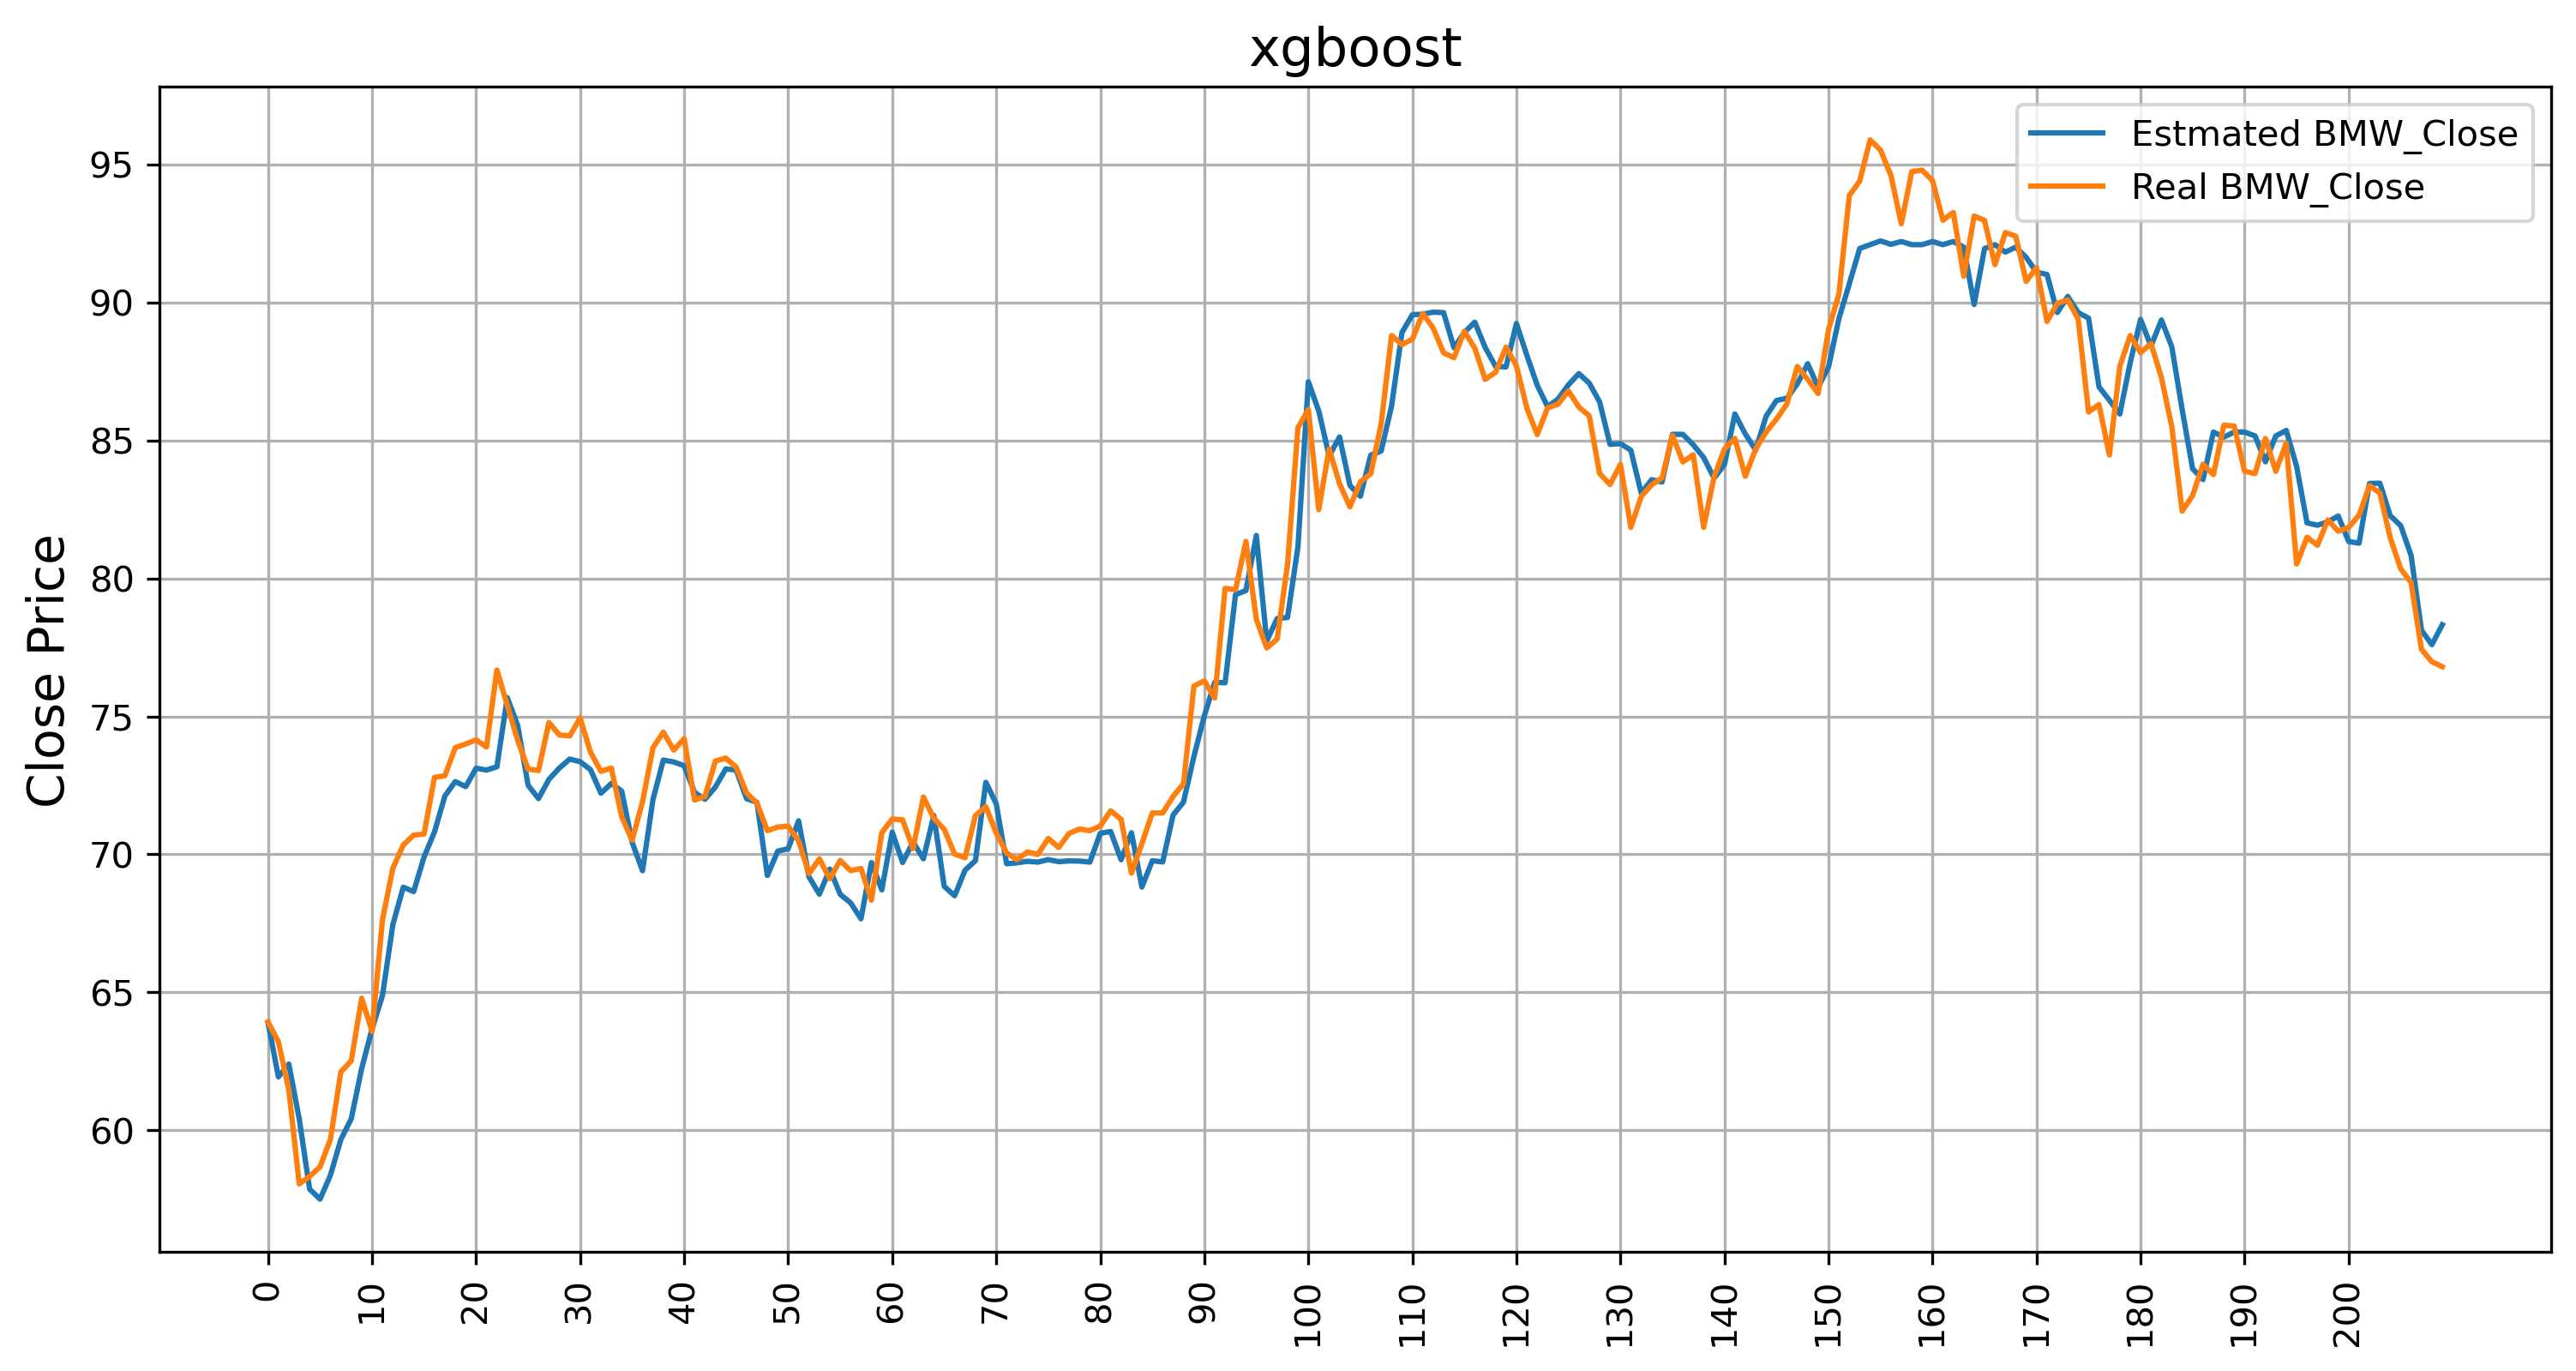

r2_socre: 0.9716614340956166


In [706]:
y_pred_xgb = result_plot(xgb_model, 'xgboost', x_train, y_train, x_test, y_test)

### RF

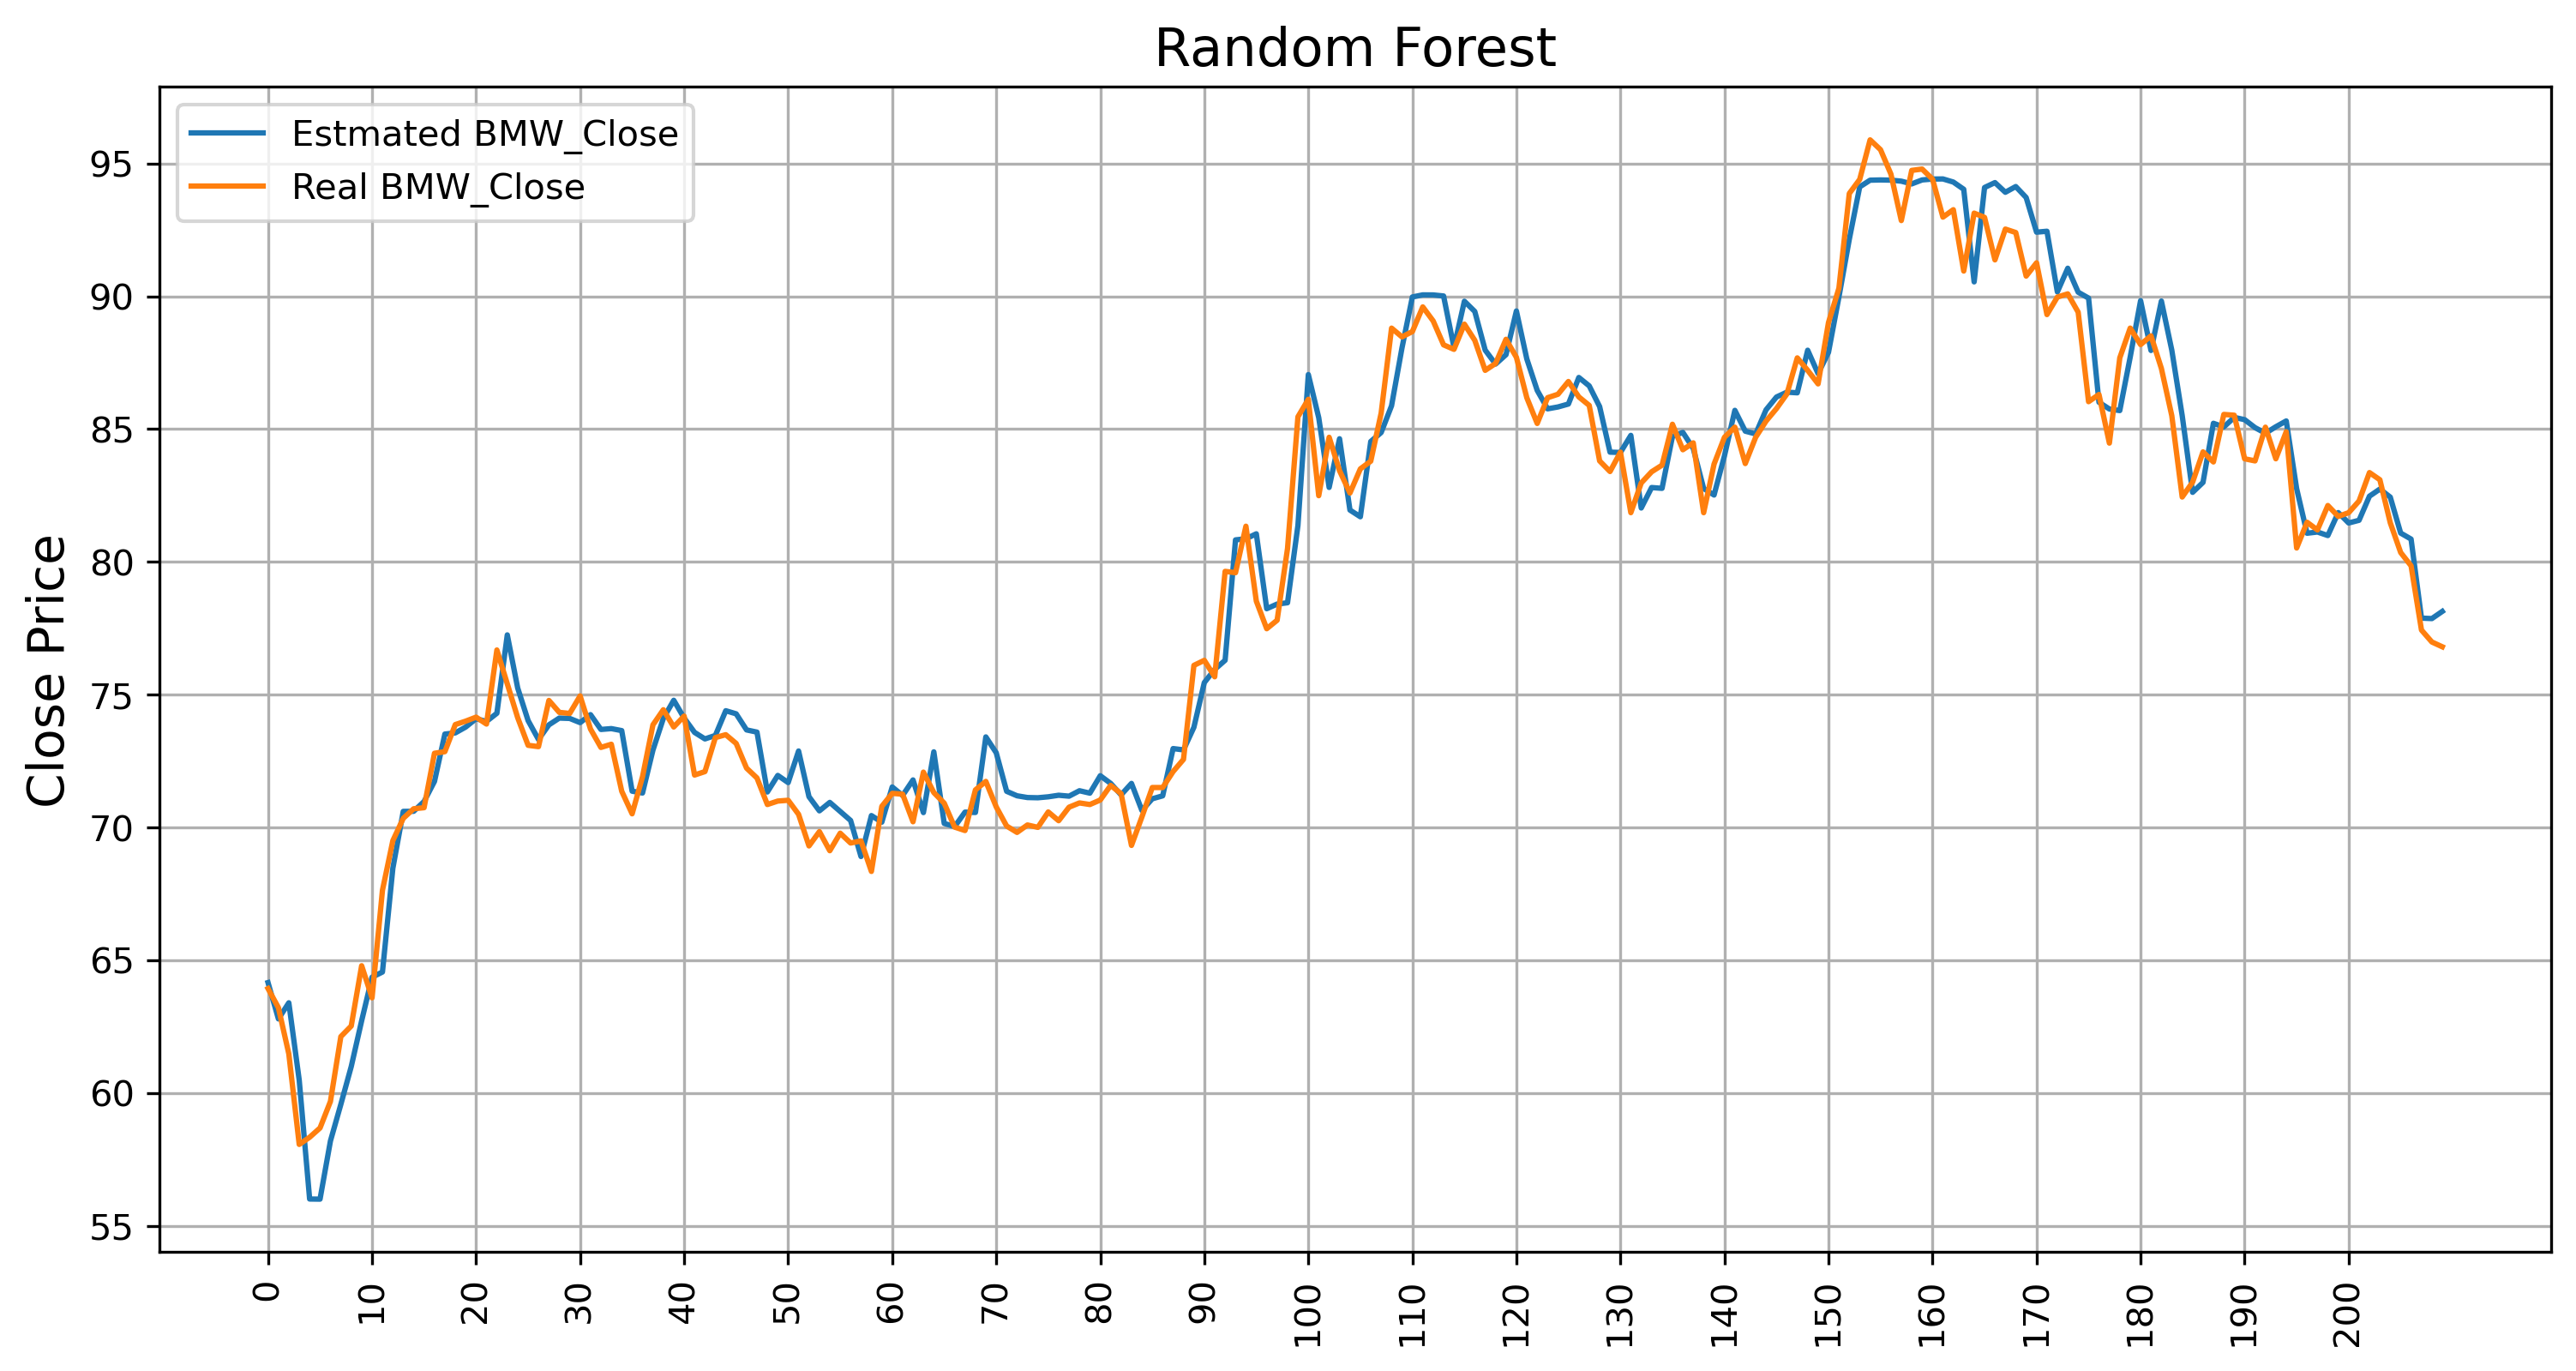

r2_socre: 0.9755586011030013


In [690]:
y_pred_rf = result_plot(rf_model, 'Random Forest', x_train, y_train, x_test, y_test)

### LinearRegression

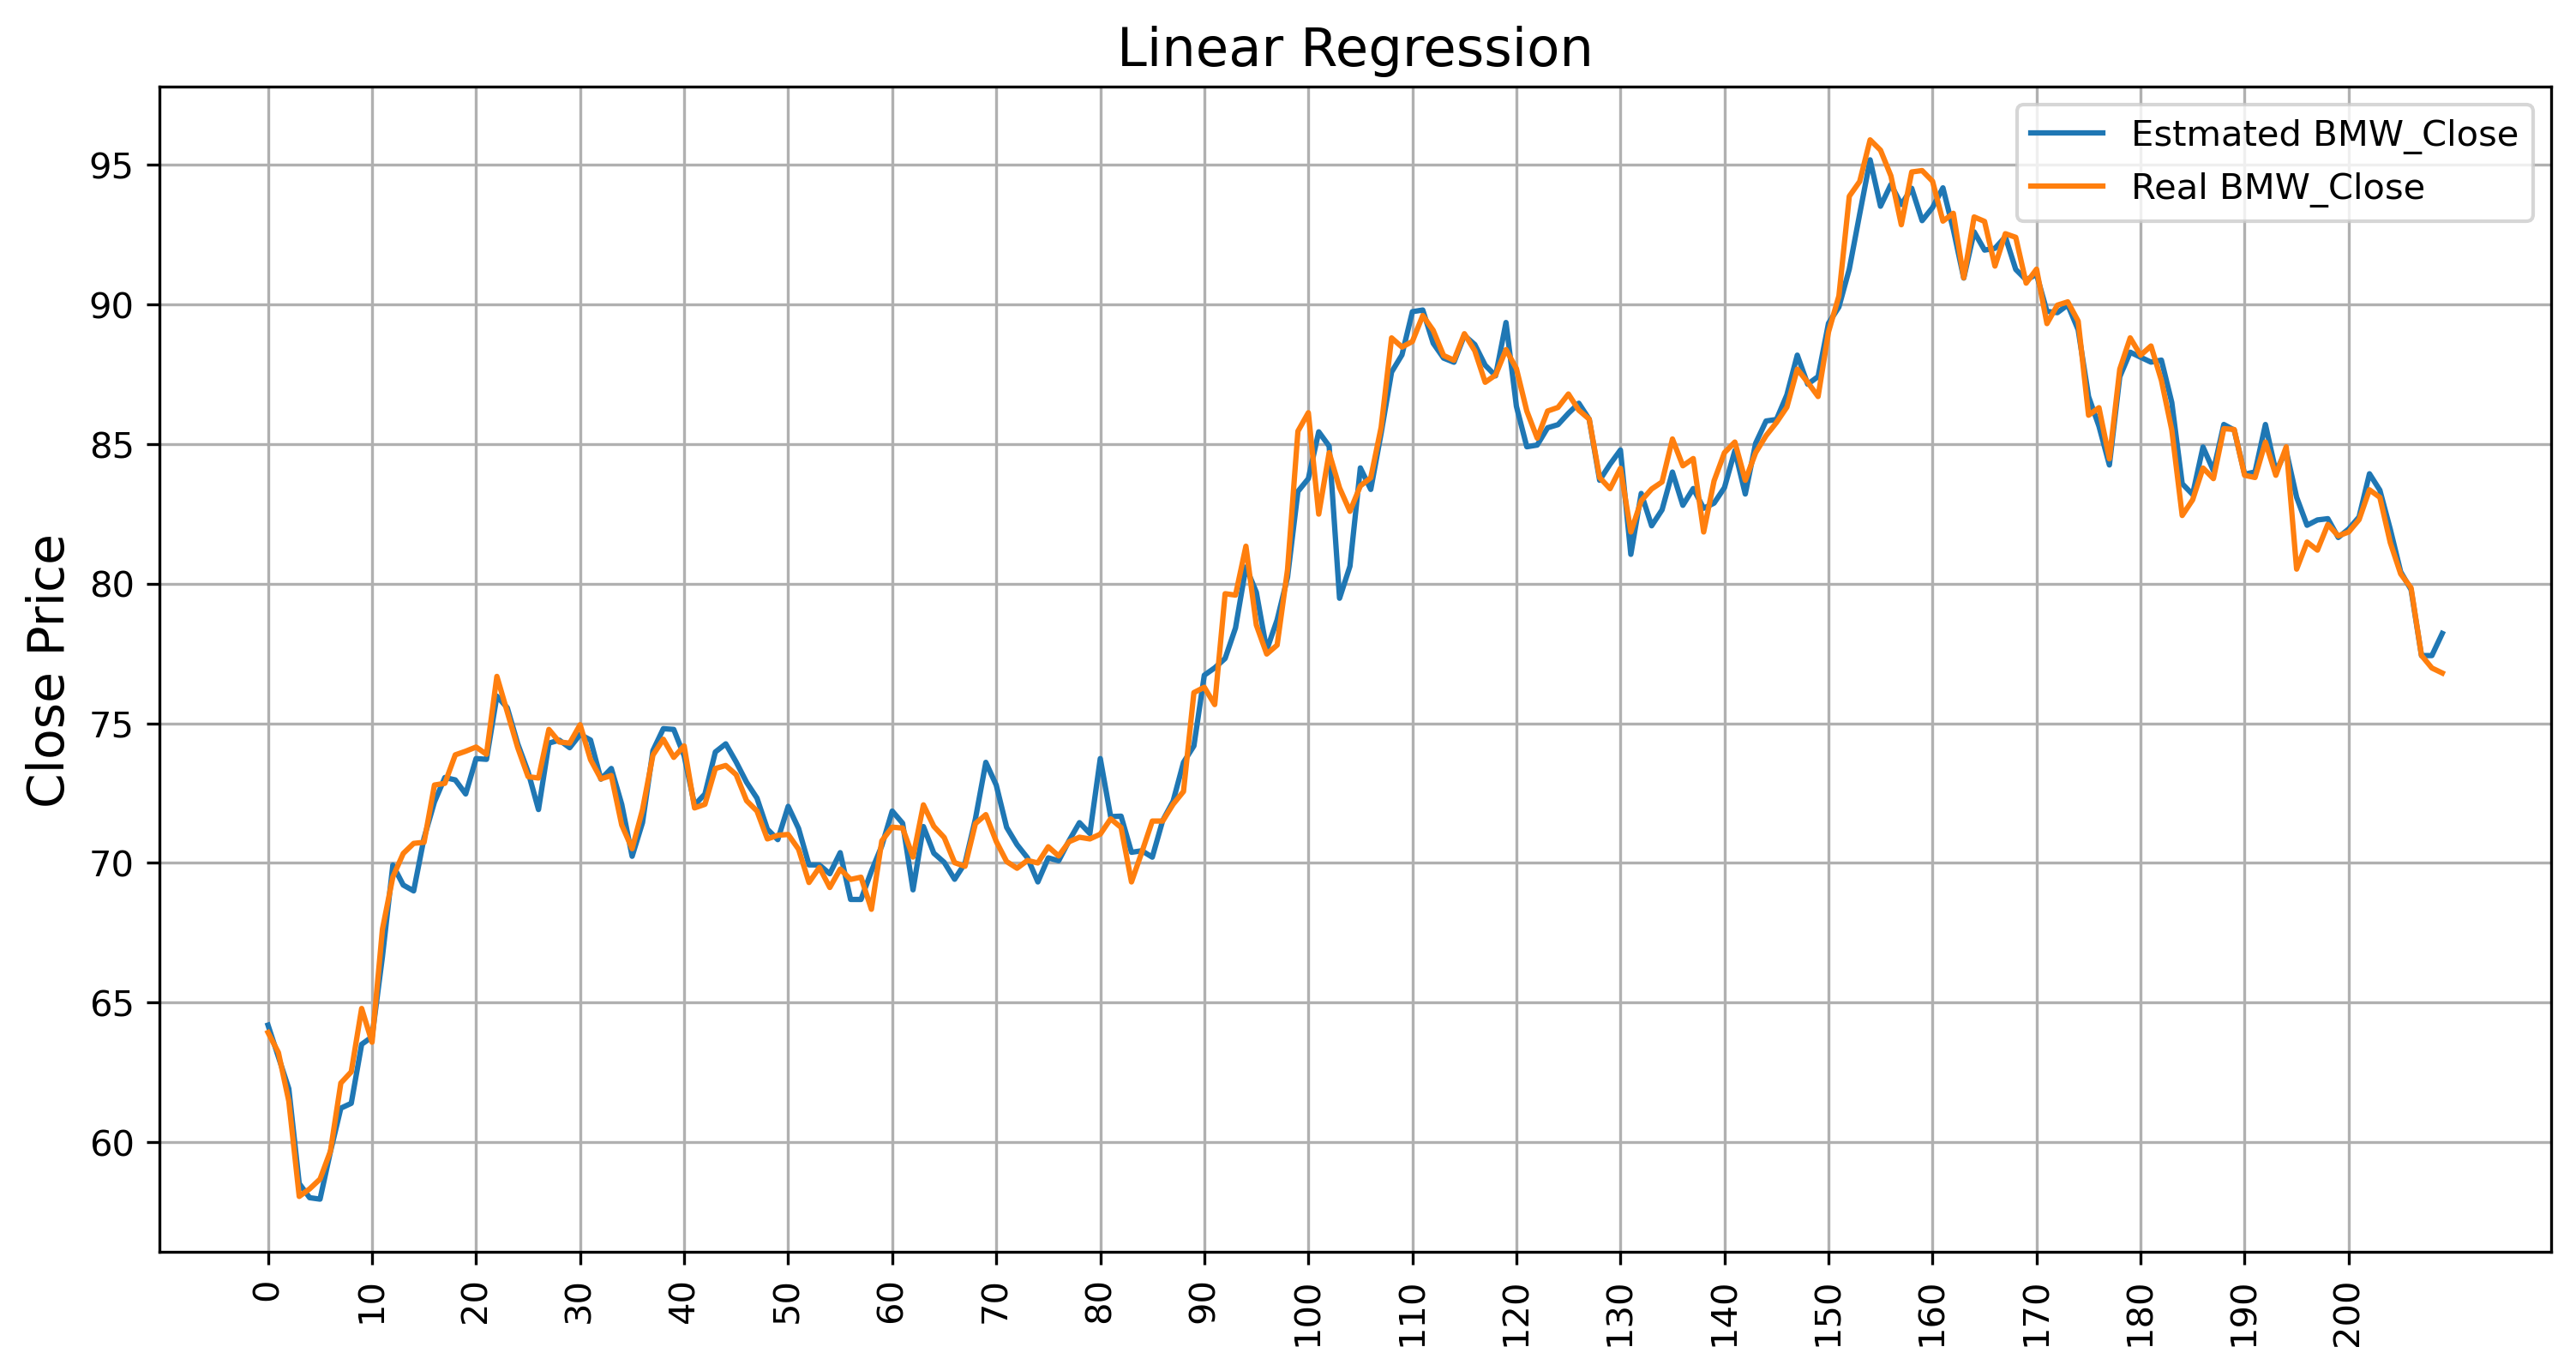

r2_socre: 0.9893091620587419


In [619]:
y_pred_LR = result_plot(LR, 'Linear Regression', x_train, y_train, x_test, y_test)

### Linear model: Ridge

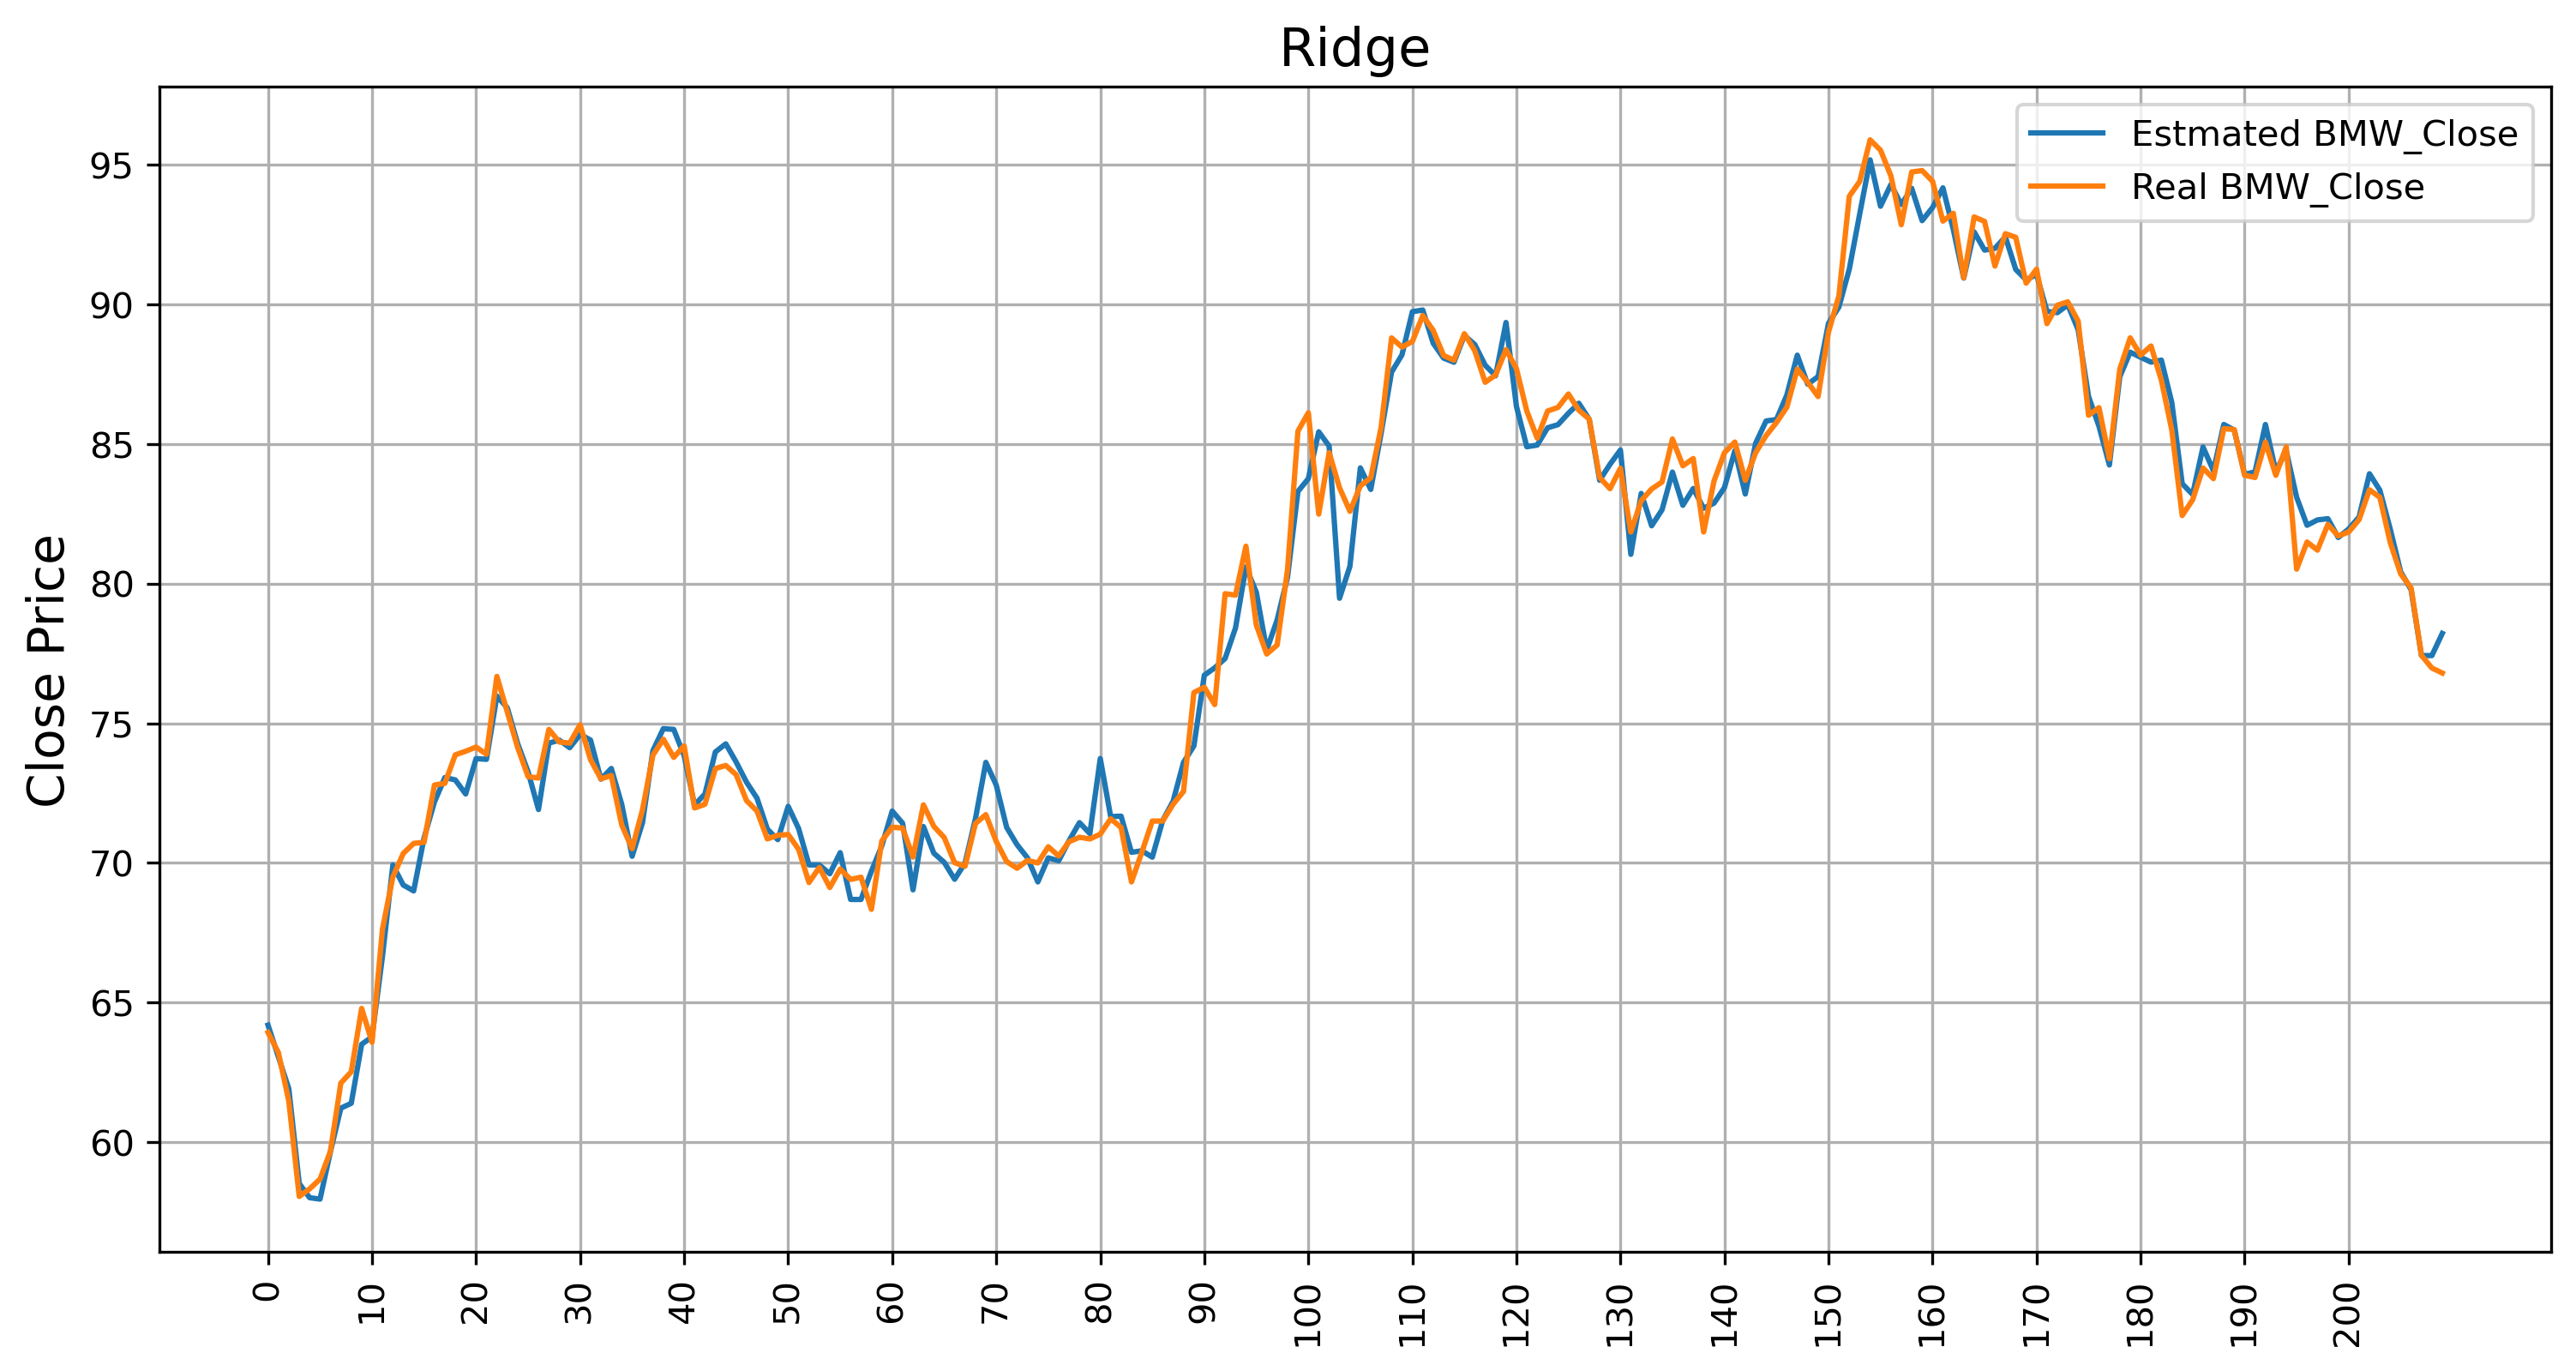

r2_socre: 0.9893094088067638


In [620]:
y_pred_Ridge = result_plot(Ridge_model, 'Ridge', x_train, y_train, x_test, y_test)

## Geometric Mean

In [621]:
from scipy.stats.mstats import gmean

In [691]:
y_pred_gmean = gmean([y_pred_xgb, y_pred_rf, y_pred_LR, y_pred_Ridge])

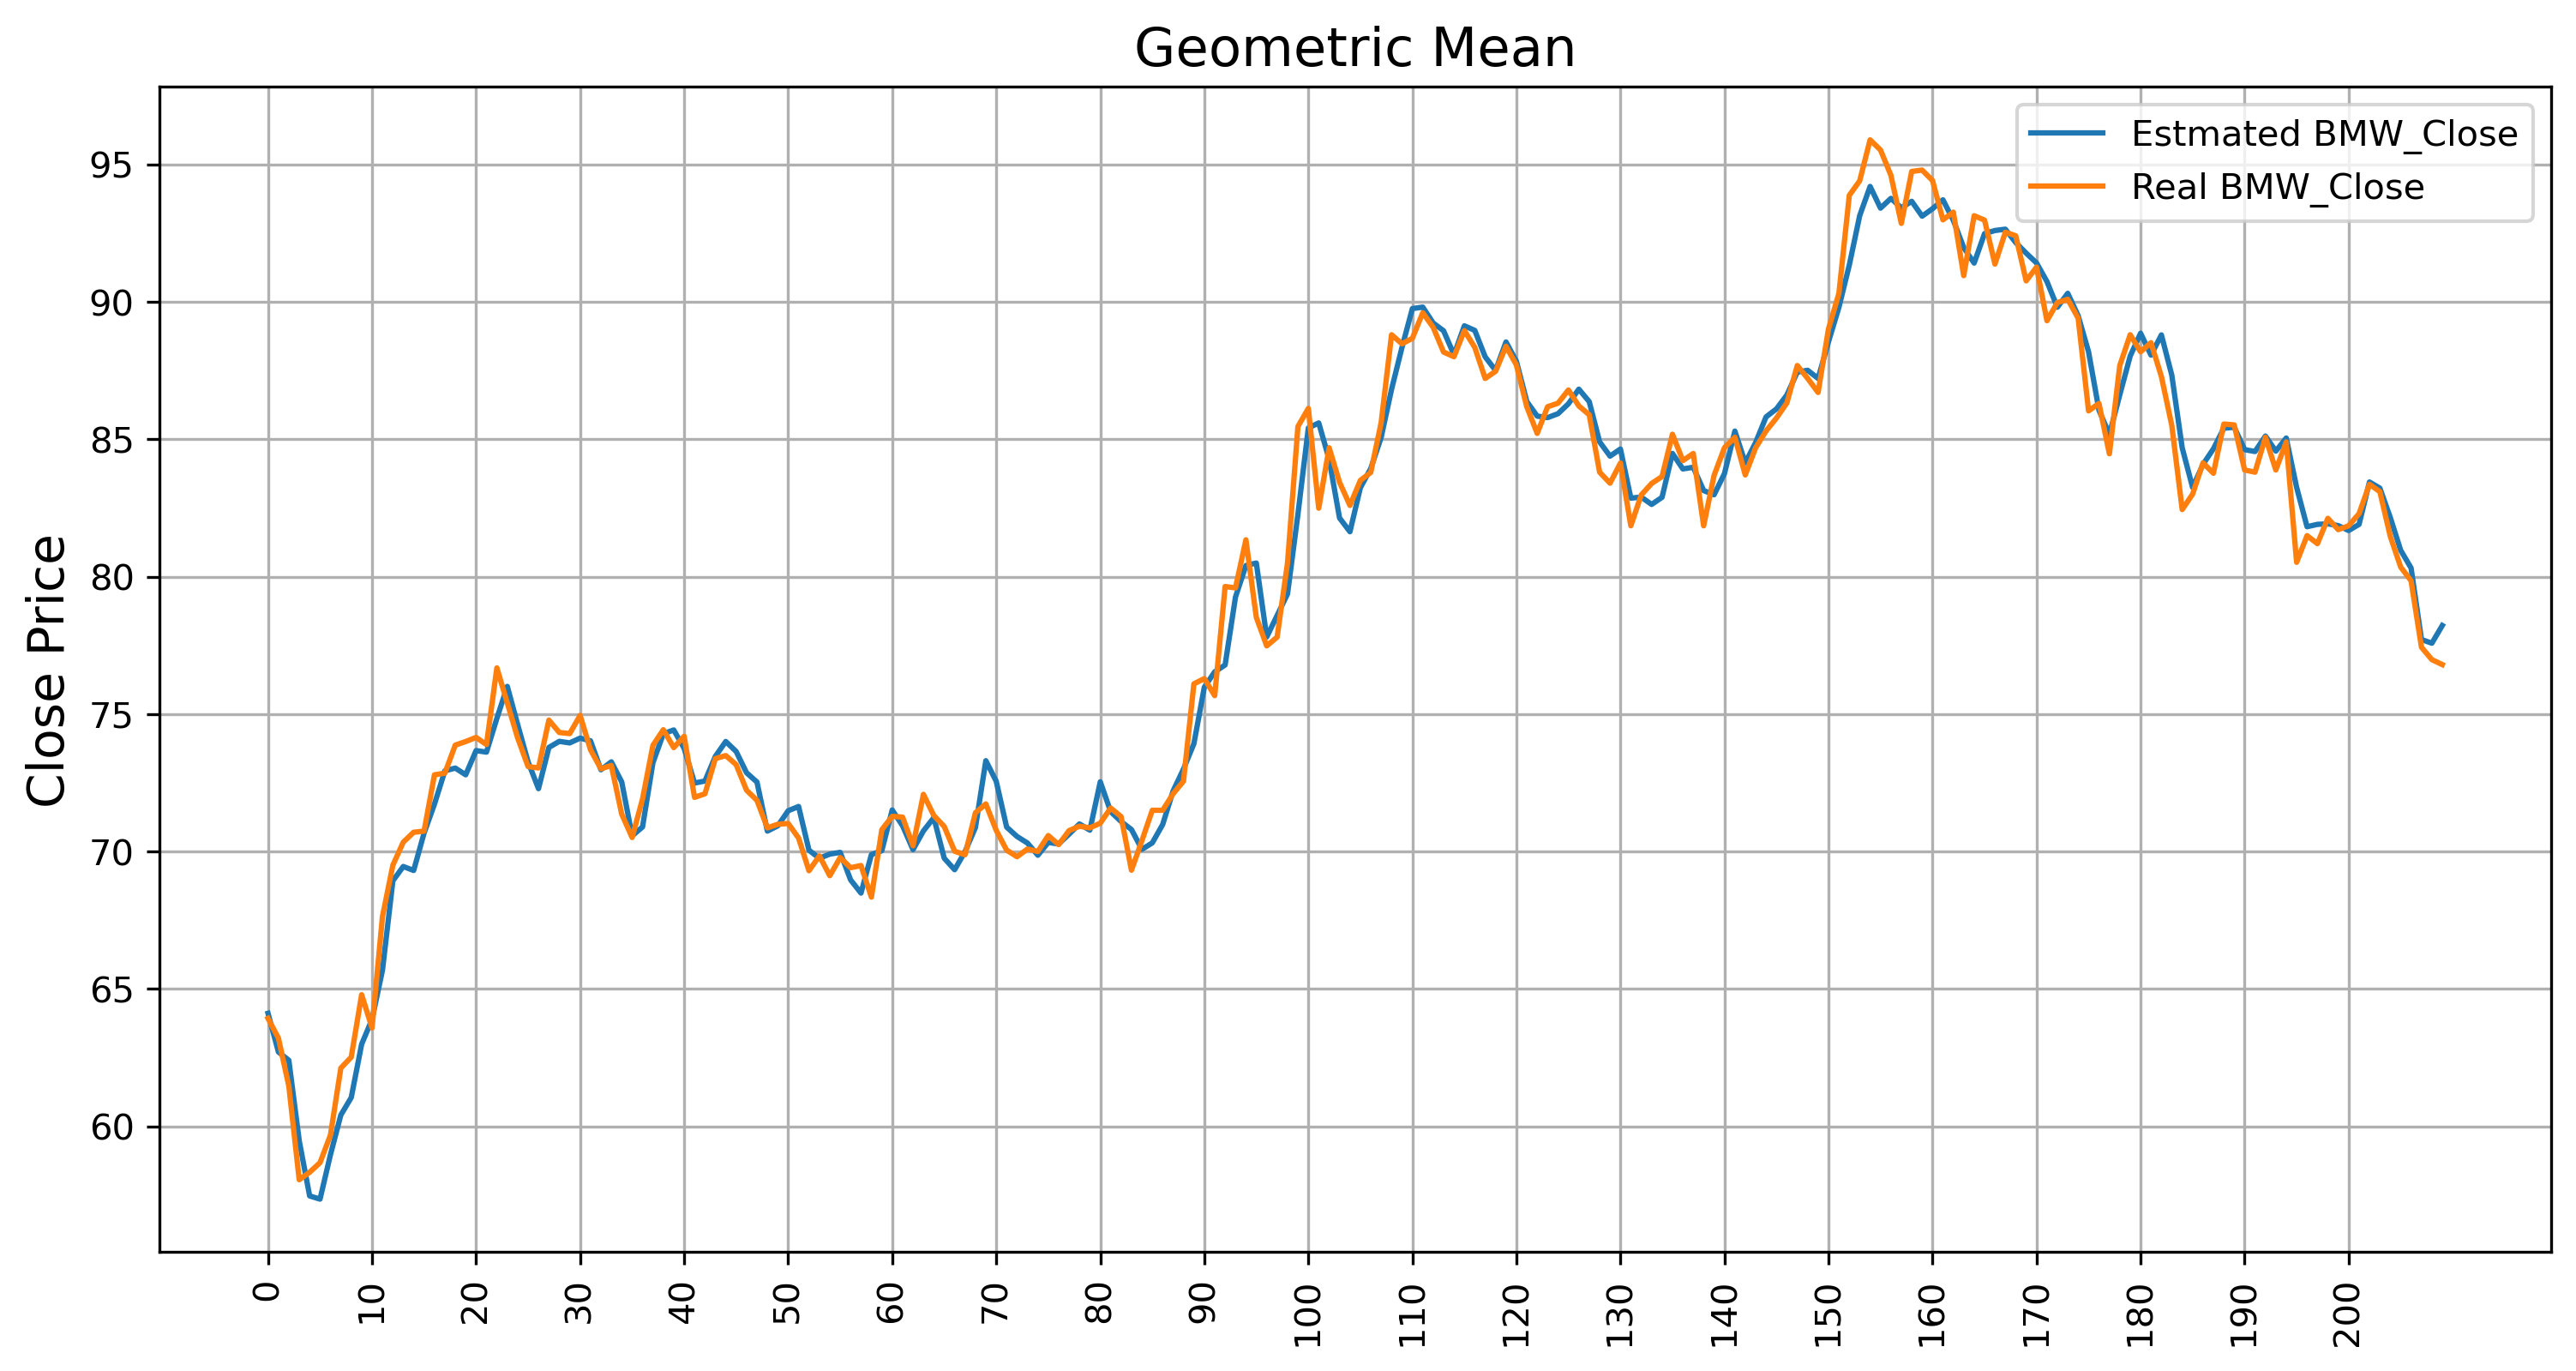

r2_socre: 0.9882275923712948


In [692]:
plt.figure(figsize=(12,6),dpi=300)
plt.plot(y_pred_gmean, label="Estmated BMW_Close")
plt.plot(y_test, label="Real BMW_Close")
plt.title('Geometric Mean', fontsize=15)
plt.legend()
plt.grid()
plt.xticks(np.arange(0, y_test.shape[0], int(y_test.shape[0] / 20)),
           rotation=90)
plt.ylabel('Close Price', fontsize=14)
plt.show()
print('r2_socre:', r2_score(y_test, y_pred_gmean, multioutput='uniform_average'))

## All

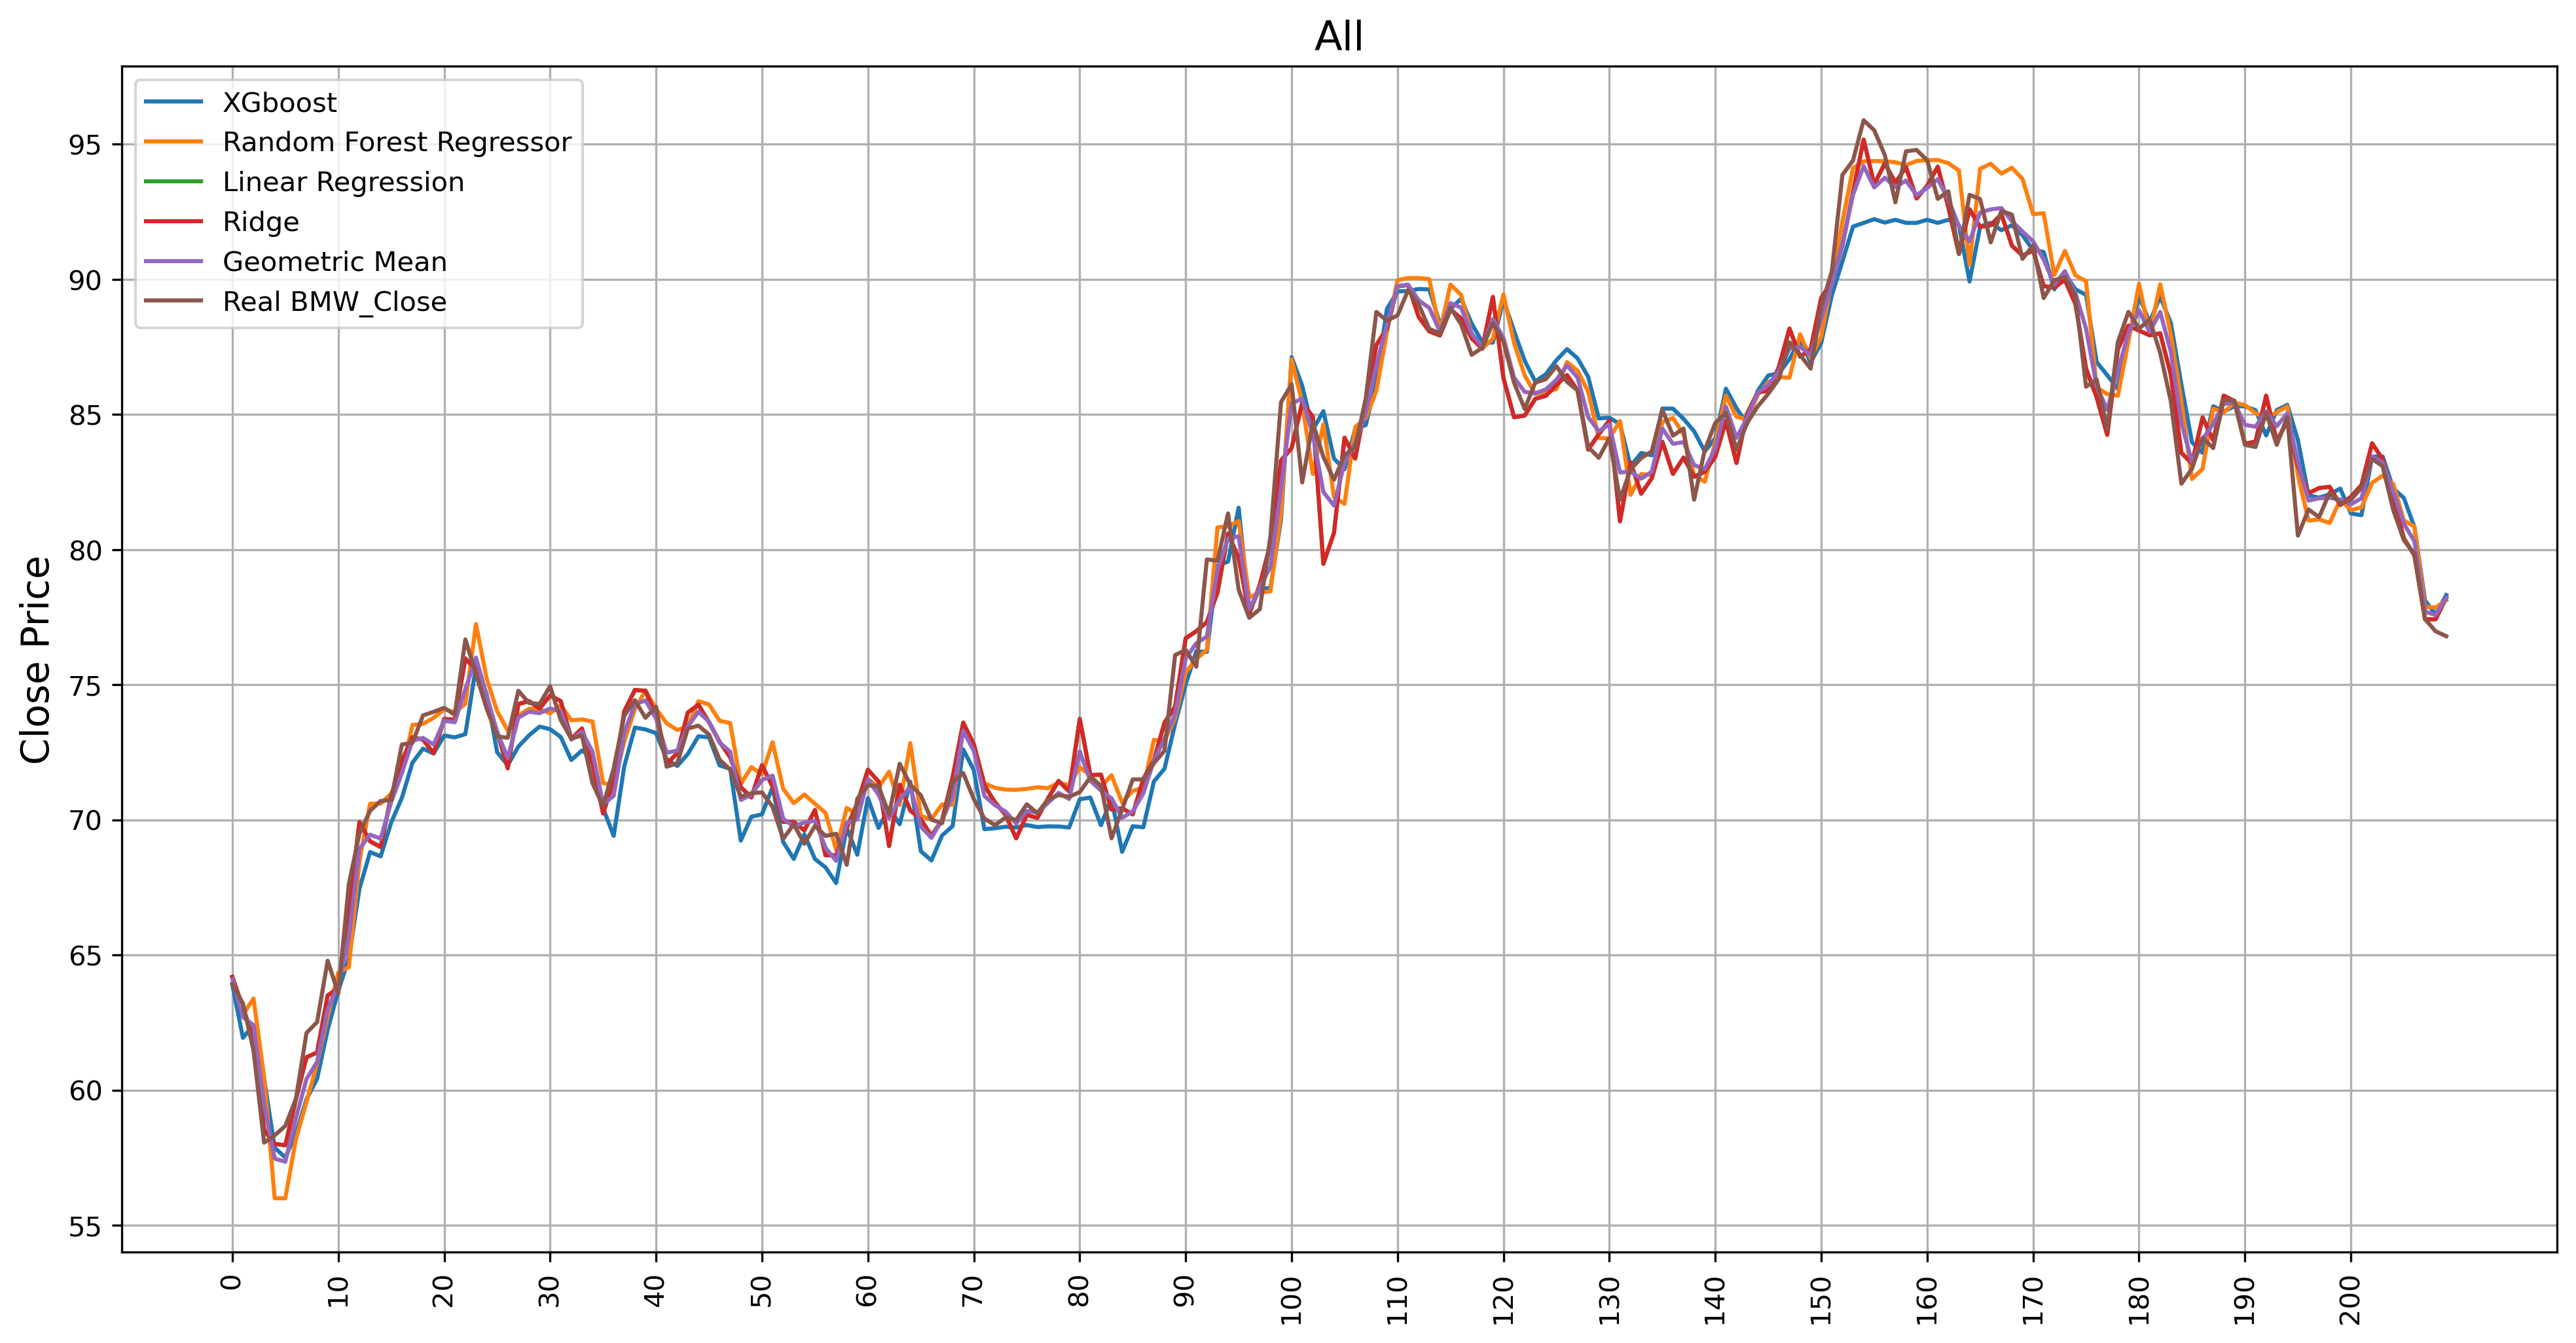

In [693]:
plt.figure(figsize=(16,8),dpi=300)
plt.plot(y_pred_xgb, label="XGboost")
plt.plot(y_pred_rf, label="Random Forest Regressor")
plt.plot(y_pred_LR, label="Linear Regression")
plt.plot(y_pred_Ridge, label="Ridge")
plt.plot(y_pred_gmean, label="Geometric Mean")
plt.plot(y_test, label="Real BMW_Close")
plt.title('All', fontsize=15)
plt.legend()
plt.grid()
plt.xticks(np.arange(0, y_test.shape[0], int(y_test.shape[0] / 20)),
           rotation=90)
plt.ylabel('Close Price', fontsize=14)
plt.show()

In [625]:
value1 = list()
for i in range(len(y_test)):
    value1.append(np.abs([y_test[i]-y_pred_gmean[i]]))

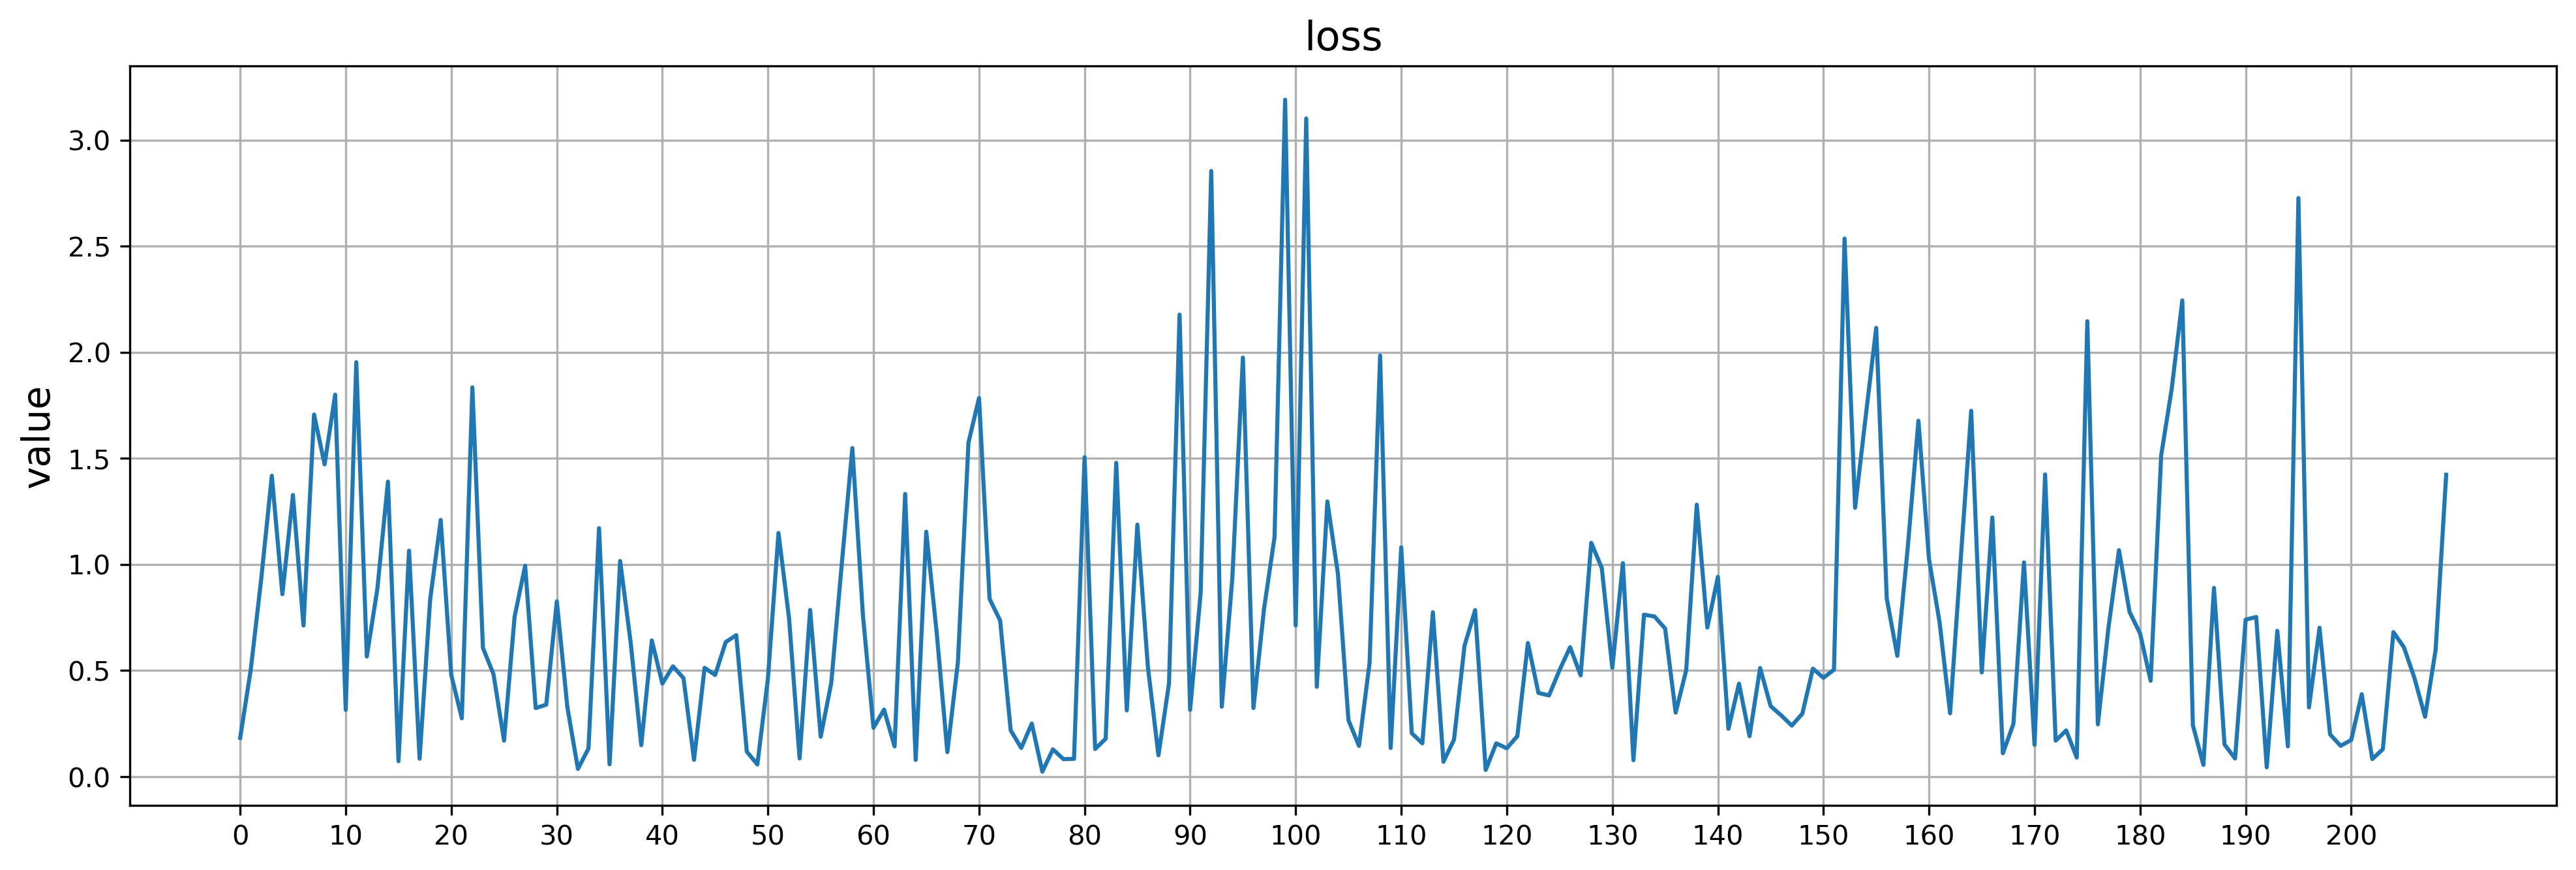

In [626]:
plt.figure(figsize=(16,5),dpi=300)
plt.plot(value1)
plt.title('loss', fontsize=15)
plt.grid()
plt.xticks(np.arange(0, y_test.shape[0],10))
plt.ylabel('value', fontsize=14)
plt.show()

In [627]:
coef = pd.Series(LR.coef_, index=DATA_L.columns[DATA_L.columns != 'bmw_Close'])
coef

bmw_Open                0.742992
bmw_High_yesterday      0.057550
bmw_Low_yesterday       0.158858
Volkswagen_Open        -0.103321
Volkswagen_Close        0.099050
                          ...   
CSI300_Low_yesterday    0.000674
USDX_Open              -0.151533
USDX_Close              0.256645
USDX_High_yesterday    -0.038707
USDX_Low_yesterday     -0.021047
Length: 63, dtype: float64

Text(0.5, 1.0, 'Feature importance for BMW_Close')

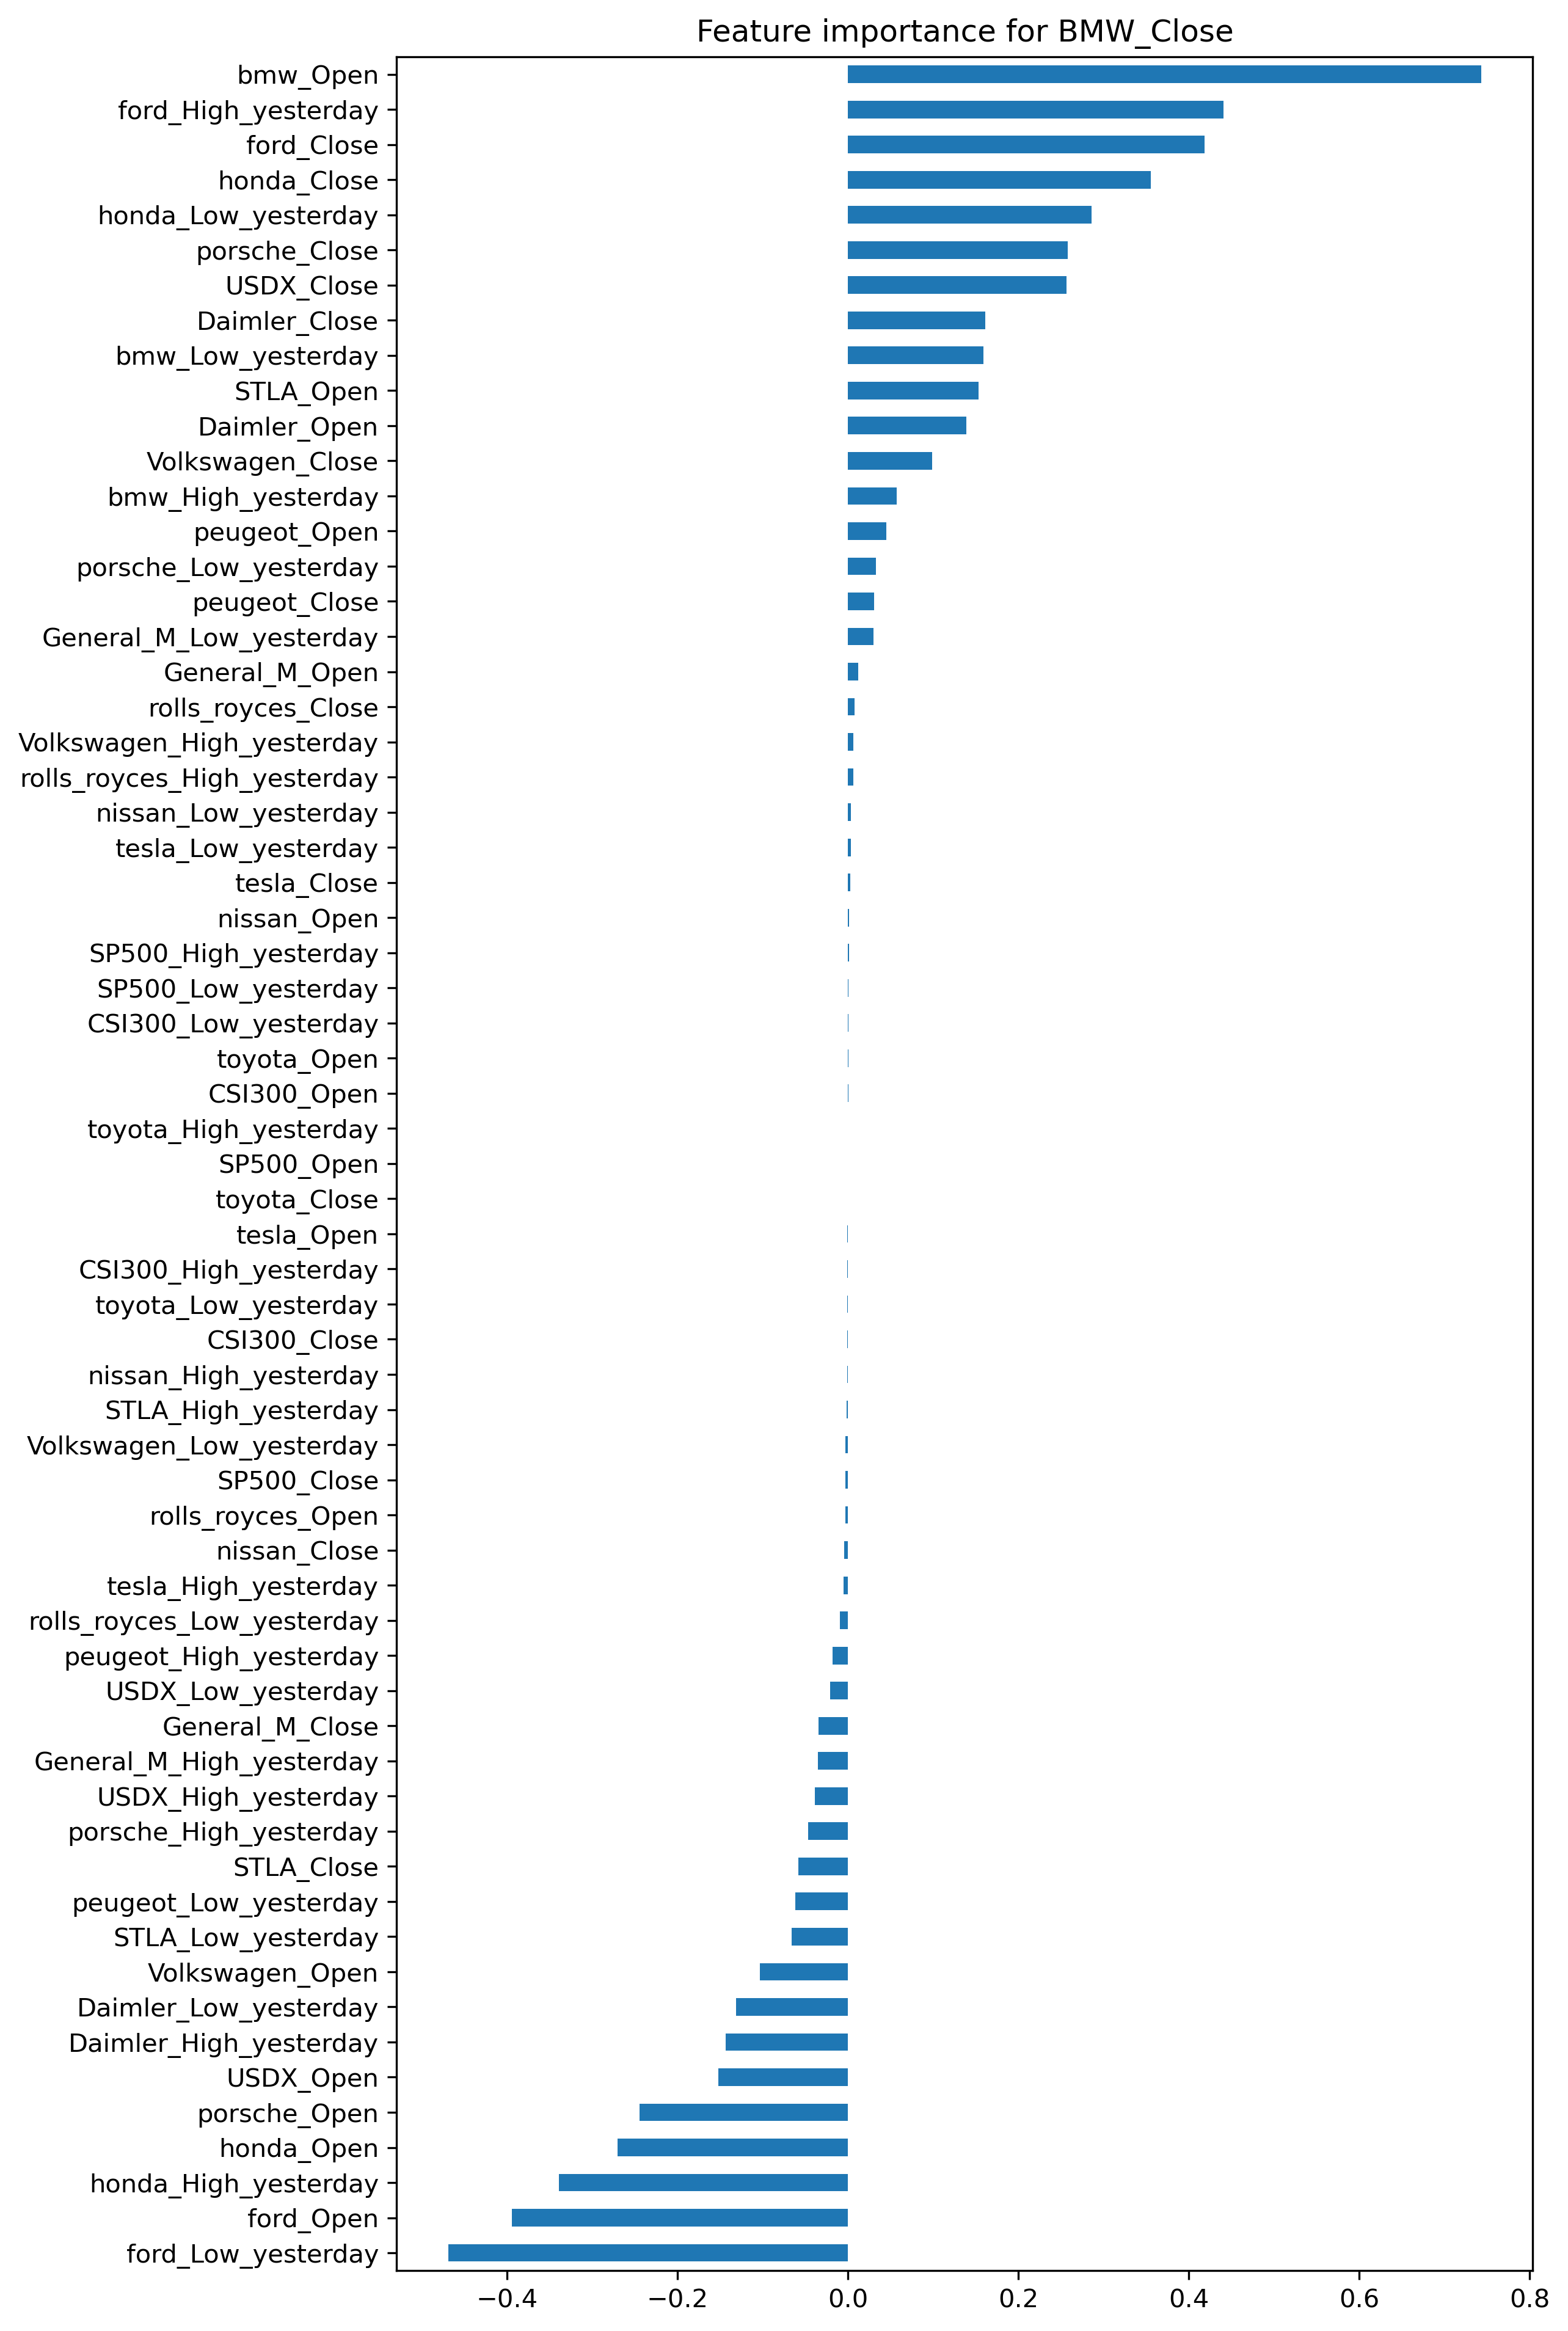

In [632]:
plt.figure(figsize=(8,16),dpi=300)
imp_coef = coef.sort_values()
import matplotlib
imp_coef.plot(kind = "barh")
plt.title("Feature importance for BMW_Close")

# 用这个流程预测一下15天的数据(08.24-09.07)

## Get data

### SP500

In [97]:
import pandas_datareader.data as pdr

In [171]:
sp500_15 = pdr.DataReader(name='^GSPC',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [173]:
sp500_15.to_csv('./data/sp500_15.csv')

In [633]:
sp500_15 = fueryouc('sp500_15')
sp500_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,4484.399902,4486.229980,4489.879883,4450.290039
2021-08-25,4490.450195,4496.189941,4492.810059,4482.279785
2021-08-26,4493.750000,4470.000000,4501.709961,4485.660156
2021-08-27,4474.100098,4509.370117,4495.899902,4468.990234
2021-08-30,4513.759766,4528.790039,4513.330078,4474.100098
2021-08-31,4529.750000,4522.680176,4537.359863,4513.759766
2021-09-01,4528.799805,4524.089844,4531.390137,4515.799805
2021-09-02,4534.479980,4536.950195,4537.109863,4522.020020
2021-09-03,4532.419922,4535.430176,4545.850098,4524.660156


### CSI300

In [175]:
import tushare as ts

In [176]:
CSI300_15 = ts.get_k_data('hs300', start='2021-08-23',
                          end='2021-09-07').reset_index(drop=True)

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [177]:
CSI300_15 = CSI300_15.iloc[:, :-1]
for name in CSI300_15.columns:
    CSI300_15 = CSI300_15.rename(columns={name: name.title()})

In [178]:
csi300_15 = CSI300_15.copy().set_index('Date')
csi300_15

,Open,Close,High,Low,Volume
Date,,,,,
2021-08-23,4777.73,4835.88,4843.82,4764.01,167579093.0
2021-08-24,4844.59,4888.39,4906.20,4842.75,197883163.0
2021-08-25,4890.52,4898.16,4899.77,4865.76,189448016.0
2021-08-26,4892.20,4801.61,4892.20,4798.70,197617387.0
2021-08-27,4794.97,4827.04,4863.47,4793.59,183310211.0
2021-08-30,4847.03,4813.27,4849.16,4787.20,219635757.0
2021-08-31,4803.09,4805.61,4821.76,4740.75,235118658.0
2021-09-01,4804.69,4869.46,4906.40,4763.30,326721080.0
2021-09-02,4865.82,4869.41,4892.70,4845.62,267858013.0


In [179]:
csi300_15.to_csv('./data/CSI300_15.csv')

In [634]:
CSI300_15 = loadData('CSI300_15').iloc[:, :-1]
CSI300_15['High_yesterday'] = CSI300_15['High'].shift(1)
CSI300_15['Low_yesterday'] = CSI300_15['Low'].shift(1)
CSI300_15 = CSI300_15.drop(['High','Low'],axis=1).iloc[1:]
CSI300_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,4844.59,4888.39,4843.82,4764.01
2021-08-25,4890.52,4898.16,4906.20,4842.75
2021-08-26,4892.20,4801.61,4899.77,4865.76
2021-08-27,4794.97,4827.04,4892.20,4798.70
2021-08-30,4847.03,4813.27,4863.47,4793.59
2021-08-31,4803.09,4805.61,4849.16,4787.20
2021-09-01,4804.69,4869.46,4821.76,4740.75
2021-09-02,4865.82,4869.41,4906.40,4763.30
2021-09-03,4875.07,4843.06,4892.70,4845.62


### USDX

In [185]:
USDX_15 = pdr.DataReader(name='DX-Y.NYB',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [186]:
USDX_15.to_csv('./data/USDX_15.csv')

In [635]:
USDX_15 = fueryouc('USDX_15')
USDX_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,92.989998,92.889999,93.510002,92.949997
2021-08-25,92.879997,92.830002,93.080002,92.809998
2021-08-26,92.830002,93.059998,93.129997,92.809998
2021-08-27,93.029999,92.690002,93.080002,92.809998
2021-08-30,92.680000,92.650002,93.180000,92.629997
2021-08-31,92.709999,92.629997,92.790001,92.599998
2021-09-01,92.660004,92.449997,92.750000,92.400002
2021-09-02,92.510002,92.230003,92.790001,92.379997
2021-09-03,92.220001,92.040001,92.540001,92.209999


### car companies

#### BMW

In [189]:
bmw_15 = pdr.DataReader(name='BMW.DE',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [191]:
bmw_15.to_csv('./data/bmw_15.csv')

In [636]:
bmw_15 = loadData('bmw_15').iloc[:, :-2]
bmw_15['High_yesterday'] = bmw_15['High'].shift(1)
bmw_15['Low_yesterday'] = bmw_15['Low'].shift(1)
bmw_15 = bmw_15.drop(['High','Low'],axis=1).iloc[1:]
bmw_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,77.199997,78.419998,78.480003,76.570000
2021-08-25,78.349998,78.000000,78.970001,76.930000
2021-08-26,77.250000,77.940002,78.989998,77.419998
2021-08-27,78.279999,78.279999,78.220001,76.690002
2021-08-30,78.599998,79.050003,78.489998,77.339996
2021-08-31,79.480003,80.370003,79.239998,77.779999
2021-09-01,81.339996,79.470001,81.180000,79.440002
2021-09-02,79.690002,79.419998,81.559998,79.150002
2021-09-03,79.900002,79.400002,80.000000,79.300003


#### Volkswagen

In [196]:
Volkswagen_15 = pdr.DataReader(name='VOW3.DE',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [198]:
Volkswagen_15.to_csv('./data/Volkswagen_15.csv')

In [637]:
Volkswagen_15 = fueryouc('Volkswagen_15')
Volkswagen_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,196.179993,198.759995,196.000000,193.500000
2021-08-25,199.380005,199.699997,199.740005,195.399994
2021-08-26,198.600006,200.000000,202.250000,198.000000
2021-08-27,200.050003,200.750000,201.449997,197.520004
2021-08-30,201.350006,201.000000,200.800003,198.699997
2021-08-31,202.350006,201.300003,202.250000,200.800003
2021-09-01,203.800003,201.050003,203.850006,199.179993
2021-09-02,202.500000,202.699997,204.350006,199.979996
2021-09-03,202.800003,201.899994,203.300003,199.979996


#### tesla

In [200]:
tesla_15 = pdr.DataReader(name='TSLA',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [202]:
tesla_15.to_csv('./data/tesla_15.csv')

In [638]:
tesla_15 = fueryouc('tesla_15')
tesla_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,710.679993,708.489990,712.130005,680.750000
2021-08-25,707.030029,711.200012,715.219971,702.640015
2021-08-26,708.309998,701.159973,716.969971,704.000000
2021-08-27,705.000000,711.919983,715.400024,697.619995
2021-08-30,714.719971,730.909973,715.000000,702.099976
2021-08-31,733.000000,735.719971,731.000000,712.729980
2021-09-01,734.080017,734.090027,740.390015,726.440002
2021-09-02,734.500000,732.390015,741.989990,731.270020
2021-09-03,732.250000,733.570007,740.969971,730.539978


#### nissian

In [205]:
nissan_15 = pdr.DataReader(name='7201.T',data_source='yahoo',start='2021-08-23',end='2021-09-07')

In [207]:
nissan_15.to_csv('./data/nissan_15.csv')

In [639]:
nissan_15 = fueryouc('nissan_15')
nissan_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,546.299988,559.799988,550.000000,533.500000
2021-08-25,562.799988,568.299988,562.799988,546.299988
2021-08-26,570.799988,566.000000,576.299988,560.500000
2021-08-27,557.599976,569.099976,571.700012,560.299988
2021-08-30,586.099976,579.400024,569.099976,555.599976
2021-08-31,566.000000,578.500000,587.599976,575.500000
2021-09-01,583.799988,575.400024,581.400024,563.700012
2021-09-02,570.500000,559.099976,585.200012,573.599976
2021-09-03,561.400024,569.599976,572.700012,556.099976


#### honda

In [209]:
honda_15 = pdr.DataReader(name='HMC',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [211]:
honda_15.to_csv('./data/honda_15.csv')

In [640]:
honda_15 = fueryouc('honda_15')
honda_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,30.100000,30.200001,30.200001,29.809999
2021-08-25,30.070000,30.100000,30.340000,30.049999
2021-08-26,29.910000,29.389999,30.190001,29.879999
2021-08-27,29.530001,29.850000,29.910000,29.350000
2021-08-30,30.020000,29.879999,29.870001,29.530001
2021-08-31,30.110001,30.260000,30.049999,29.809999
2021-09-01,30.440001,30.450001,30.400000,30.070000
2021-09-02,30.540001,30.459999,30.580000,30.360001
2021-09-03,30.709999,30.820000,30.590000,30.330000


#### other

In [217]:
toyota_15 = pdr.DataReader(name='7203.T',data_source='yahoo',start='2021-08-23',end='2021-09-07')

In [219]:
toyota_15.to_csv('./data/toyota_15.csv')

In [641]:
toyota_15 = fueryouc('toyota_15')
toyota_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,9289,9272,9273.0,9048.0
2021-08-25,9370,9484,9314.0,9236.0
2021-08-26,9550,9507,9559.0,9365.0
2021-08-27,9409,9460,9571.0,9435.0
2021-08-30,9522,9534,9487.0,9401.0
2021-08-31,9506,9592,9563.0,9502.0
2021-09-01,9701,9652,9619.0,9456.0
2021-09-02,9645,9650,9721.0,9621.0
2021-09-03,9640,9756,9665.0,9592.0


In [221]:
porsche_15 = pdr.DataReader(name='PAH3.DE',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [223]:
porsche_15.to_csv('./data/porsche_15.csv')

In [642]:
porsche_15 = fueryouc('porsche_15')
porsche_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,83.580002,85.360001,83.660004,82.419998
2021-08-25,85.559998,85.940002,86.040001,83.500000
2021-08-26,85.300003,85.500000,87.080002,85.260002
2021-08-27,85.500000,85.940002,86.040001,84.660004
2021-08-30,86.279999,86.900002,86.139999,84.760002
2021-08-31,87.199997,85.760002,87.839996,86.279999
2021-09-01,86.400002,85.519997,87.519997,85.180000
2021-09-02,86.260002,87.160004,86.500000,85.000000
2021-09-03,87.500000,87.599998,87.500000,85.800003


In [225]:
Daimler_15 = pdr.DataReader(name='DDAIF',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [227]:
Daimler_15.to_csv('./data/Daimler_15.csv')

In [643]:
Daimler_15 = fueryouc('Daimler_15')
Daimler_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,83.269997,83.199997,82.690002,81.919998
2021-08-25,83.750000,83.559998,83.559998,82.959999
2021-08-26,83.190002,82.930000,83.889999,83.379997
2021-08-27,83.209999,84.059998,83.400002,82.900002
2021-08-30,84.309998,84.500000,84.169998,83.209999
2021-08-31,83.690002,84.250000,84.900002,84.309998
2021-09-01,83.699997,84.129997,84.570000,83.690002
2021-09-02,83.510002,83.620003,84.500000,83.699997
2021-09-03,83.410004,83.360001,84.449997,83.500000


In [231]:
General_M_15 = pdr.DataReader(name='GM',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [233]:
General_M_15.to_csv('./data/General_M_15.csv')

In [644]:
General_M_15 = fueryouc('General_M_15')
General_M_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,48.500000,49.570000,48.349998,47.070000
2021-08-25,49.490002,49.700001,49.869999,48.230000
2021-08-26,49.470001,48.619999,49.930000,49.160000
2021-08-27,48.750000,49.799999,49.470001,48.520000
2021-08-30,49.950001,49.169998,50.070000,48.660000
2021-08-31,49.169998,49.009998,49.950001,48.950001
2021-09-01,49.099998,49.110001,49.430000,48.669998
2021-09-02,49.150002,48.950001,49.639999,48.680000
2021-09-03,48.799999,48.820000,49.500000,48.810001


In [235]:
ford_15 = pdr.DataReader(name='F',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [237]:
ford_15.to_csv('./data/ford_15.csv')

In [645]:
ford_15 = fueryouc('ford_15')
ford_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,12.81,13.08,12.85,12.47
2021-08-25,13.12,13.17,13.14,12.76
2021-08-26,13.11,12.90,13.28,13.02
2021-08-27,12.89,13.31,13.13,12.81
2021-08-30,13.35,13.05,13.37,12.87
2021-08-31,13.02,13.03,13.37,13.03
2021-09-01,13.03,13.11,13.14,12.93
2021-09-02,13.09,13.01,13.22,12.90
2021-09-03,12.99,12.89,13.21,12.97


In [239]:
peugeot_15 = pdr.DataReader(name='PEUG.PA',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [241]:
peugeot_15.to_csv('./data/peugeot_15.csv')

In [646]:
peugeot_15 = fueryouc('peugeot_15')
peugeot_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,114.000000,114.599998,114.000000,111.400002
2021-08-25,115.800003,115.000000,114.800003,114.000000
2021-08-26,115.400002,115.000000,115.800003,114.800003
2021-08-27,115.000000,115.599998,115.800003,114.599998
2021-08-30,116.400002,115.599998,115.800003,114.599998
2021-08-31,116.000000,115.000000,117.000000,115.599998
2021-09-01,114.800003,115.199997,116.400002,114.599998
2021-09-02,115.000000,117.000000,116.000000,114.599998
2021-09-03,117.000000,115.199997,117.199997,115.000000


In [245]:
STLA_15 = pdr.DataReader(name='STLA',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [247]:
STLA_15.to_csv('./data/STLA_15.csv')

In [647]:
STLA_15 = fueryouc('STLA_15')
STLA_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,20.160000,20.360001,20.320000,20.090000
2021-08-25,20.370001,20.340000,20.459999,20.129999
2021-08-26,20.190001,20.010000,20.410000,20.290001
2021-08-27,20.030001,20.290001,20.230000,19.959999
2021-08-30,20.280001,20.010000,20.379999,20.030001
2021-08-31,20.010000,20.020000,20.280001,20.010000
2021-09-01,19.879999,20.049999,20.100000,19.820000
2021-09-02,20.129999,20.219999,20.190001,19.860001
2021-09-03,20.389999,20.280001,20.330000,20.110001


In [249]:
rolls_royces_15 = pdr.DataReader(name='RR.L',data_source='yahoo',start='2021-08-24',end='2021-09-07')

In [251]:
rolls_royces_15.to_csv('./data/rolls_royces_15.csv')

In [648]:
rolls_royces_15 = fueryouc('rolls_royces_15')
rolls_royces_15

,Open,Close,High_yesterday,Low_yesterday
Date,,,,
2021-08-24,114.300003,118.279999,114.300003,110.962997
2021-08-25,118.540001,116.480003,118.279999,114.099998
2021-08-26,115.680000,116.059998,120.570000,113.795998
2021-08-27,115.680000,116.739998,117.940002,114.500000
2021-08-31,115.400002,114.860001,116.779999,114.139999
2021-09-01,115.760002,114.940002,116.239998,113.379997
2021-09-02,114.900002,114.239998,117.059998,114.620003
2021-09-03,113.919998,111.699997,115.542000,113.440002
2021-09-06,112.580002,112.040001,114.379997,111.651001


## EDA

In [649]:
Volkswagen_15 = name_change(Volkswagen_15, "Volkswagen_15")
bmw_15 = name_change(bmw_15, "bmw_15")
tesla_15 = name_change(tesla_15, "tesla_15")
nissan_15 = name_change(nissan_15, "nissan_15")
honda_15 = name_change(honda_15, "honda_15")
sp500_15 = name_change(sp500_15, "SP500_15")
CSI300_15 = name_change(CSI300_15, "CSI300_15")
rolls_royces_15 = name_change(rolls_royces_15, "rolls_royces_15")
toyota_15 = name_change(toyota_15, "toyota_15")
porsche_15 = name_change(porsche_15, "porsche_15")
Daimler_15 = name_change(Daimler_15, "Daimler_15")
General_M_15 = name_change(General_M_15, "General_M_15")
ford_15 = name_change(ford_15, "ford_15")
peugeot_15 = name_change(peugeot_15, "peugeot_15")
STLA_15 = name_change(STLA_15, "STLA_15")
USDX_15 = name_change(USDX_15, "USDX_15")

In [650]:
DATA_15 = mergeData([bmw_15, Volkswagen_15, tesla_15, nissan_15, honda_15, rolls_royces_15,toyota_15, porsche_15,Daimler_15,General_M_15,ford_15,peugeot_15,STLA_15,sp500_15, CSI300_15,USDX_15])

In [651]:
for col in DATA_15.columns:
    linear_inter(DATA_15, col)

In [652]:
DATA_15 = DATA_15.iloc[:, :-1]

In [653]:
feature = DATA_15.loc[:, DATA_15.columns != 'bmw_15_Close'].values

In [654]:
label = DATA_15.bmw_15_Close.values
label

array([78.41999817, 78.        , 77.94000244, 78.27999878, 79.05000305,
       80.37000275, 79.47000122, 79.41999817, 79.40000153, 79.84999847,
       80.47000122])

## Predict

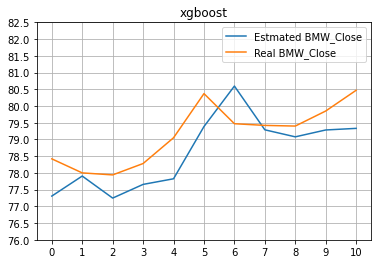

r2_socre: 0.0558841076005131
mse: 0.6904894777478396


In [694]:
# xgboost
xgb_model.fit(x,y)
y_15_xgb = xgb_model.predict(feature)

plt.plot(y_15_xgb, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('xgboost')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83,0.5))
plt.show()

print('r2_socre:', r2_score(label, y_15_xgb, multioutput='uniform_average'))
print('mse:',mean_squared_error(label, y_15_xgb))

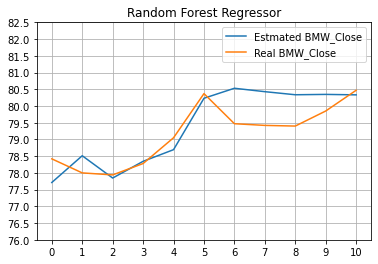

r2_socre: 0.4775944747773856
mse: 0.3820669911262527


In [695]:
# RF
rf_model.fit(x,y)
y_15_rf = rf_model.predict(feature)

plt.plot(y_15_rf, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('Random Forest Regressor')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83,0.5))
plt.show()

print('r2_socre:', r2_score(label, y_15_rf, multioutput='uniform_average'))
print('mse:',mean_squared_error(label, y_15_rf))

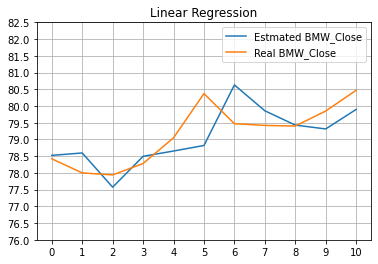

r2_socre: 0.3463522687153481
mse: 0.4780524130980563


In [657]:
# Linear Regression
LR.fit(x,y)
y_15_LR = LR.predict(feature)

plt.plot(y_15_LR, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('Linear Regression')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83,0.5))
plt.show()

print('r2_socre:', r2_score(label, y_15_LR, multioutput='uniform_average'))
print('mse:',mean_squared_error(label, y_15_LR))

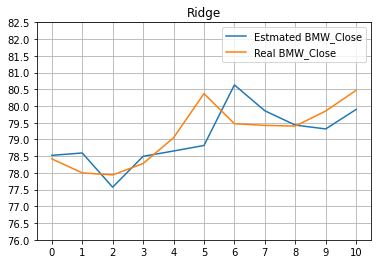

r2_socre: 0.346277632254242
mse: 0.47810699928971445


In [658]:
# Ridge
Ridge_model.fit(x,y)
y_15_Ridge = Ridge_model.predict(feature)

plt.plot(y_15_Ridge, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('Ridge')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83,0.5))
plt.show()

print('r2_socre:', r2_score(label, y_15_Ridge, multioutput='uniform_average'))
print('mse:',mean_squared_error(label, y_15_Ridge))

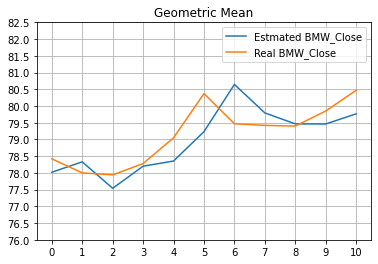

r2_socre: 0.45527898085193197
mse: 0.39838767153245824


In [676]:
y_15_gmean = gmean([y_15_xgb, y_15_rf, y_15_LR, y_15_Ridge])

plt.plot(y_15_gmean, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('Geometric Mean')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83,0.5))
plt.show()
print('r2_socre:', r2_score(label, y_15_gmean, multioutput='uniform_average'))
print('mse:',mean_squared_error(label, y_15_gmean))